In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Excel file
file_path = r"D:\GenAI SU\Objective 3\Raspberry Pi 4B\static\Threshold Analysis\static_router_results.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows to check data loading
print(df.head())


   routes  utterances_per_route           timestamp     embed_model  \
0       2                     5 2024-09-04 13:06:39  all-minilm:33m   
1       2                     5 2024-09-04 13:06:41  all-minilm:33m   
2       2                     5 2024-09-04 13:06:44  all-minilm:33m   
3       2                     5 2024-09-04 13:06:46  all-minilm:33m   
4       2                     5 2024-09-04 13:06:49  all-minilm:33m   

                                              prompt route_selected  \
0              What is Newton's first law of motion?        physics   
1             What is the process of photosynthesis?        biology   
2                 Can you explain motion in physics?        physics   
3  Tell me about cell structures and their functi...        biology   
4           How to prepare a delicious pasta recipe?        biology   

   semantic_similarity_score similarity_metric  \
0                       1.00            cosine   
1                       1.00            cosine

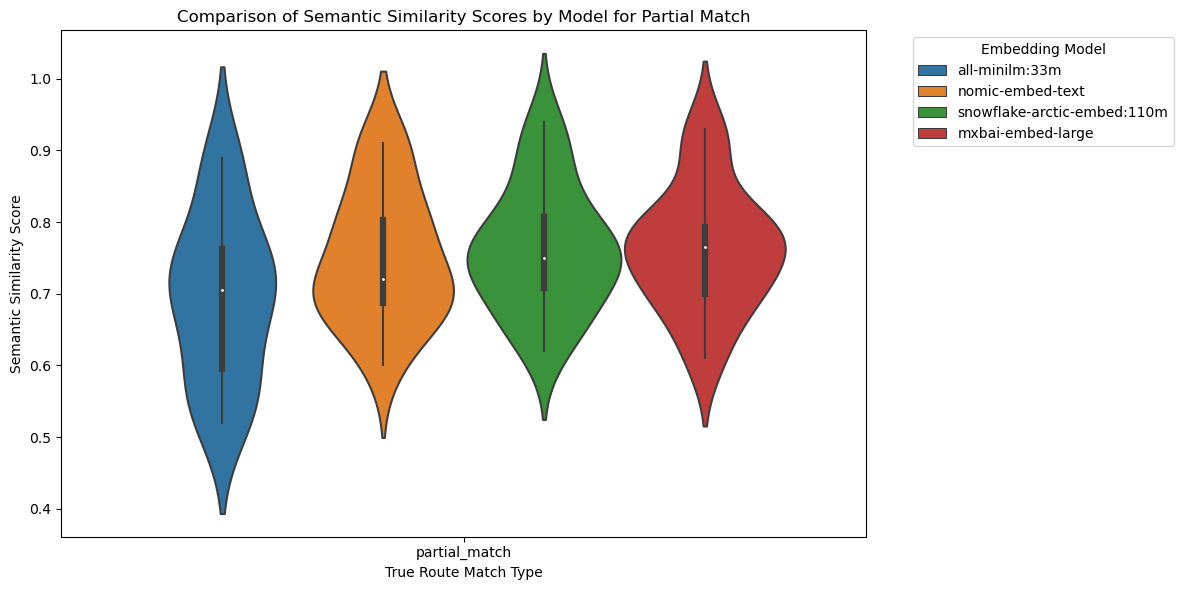


Statistics for each Embedding Model:
                embed_model   mean    std
             all-minilm:33m 0.6940 0.1152
          mxbai-embed-large 0.7620 0.0860
           nomic-embed-text 0.7505 0.0914
snowflake-arctic-embed:110m 0.7625 0.0867

Overall Statistics:
Average: 0.7423
Standard Deviation: 0.098


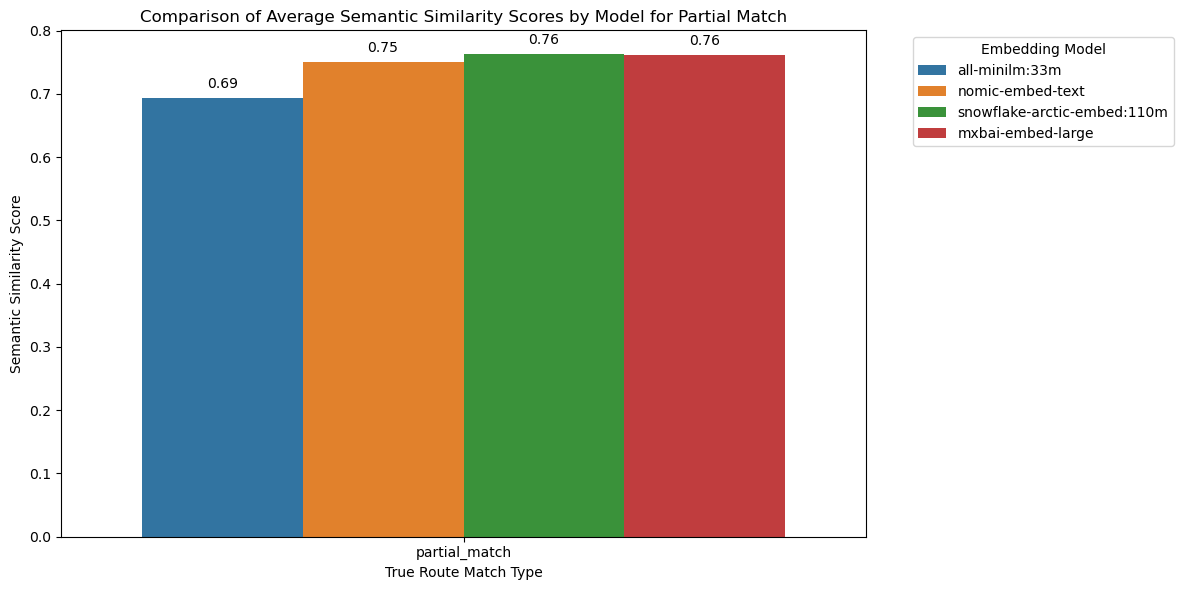

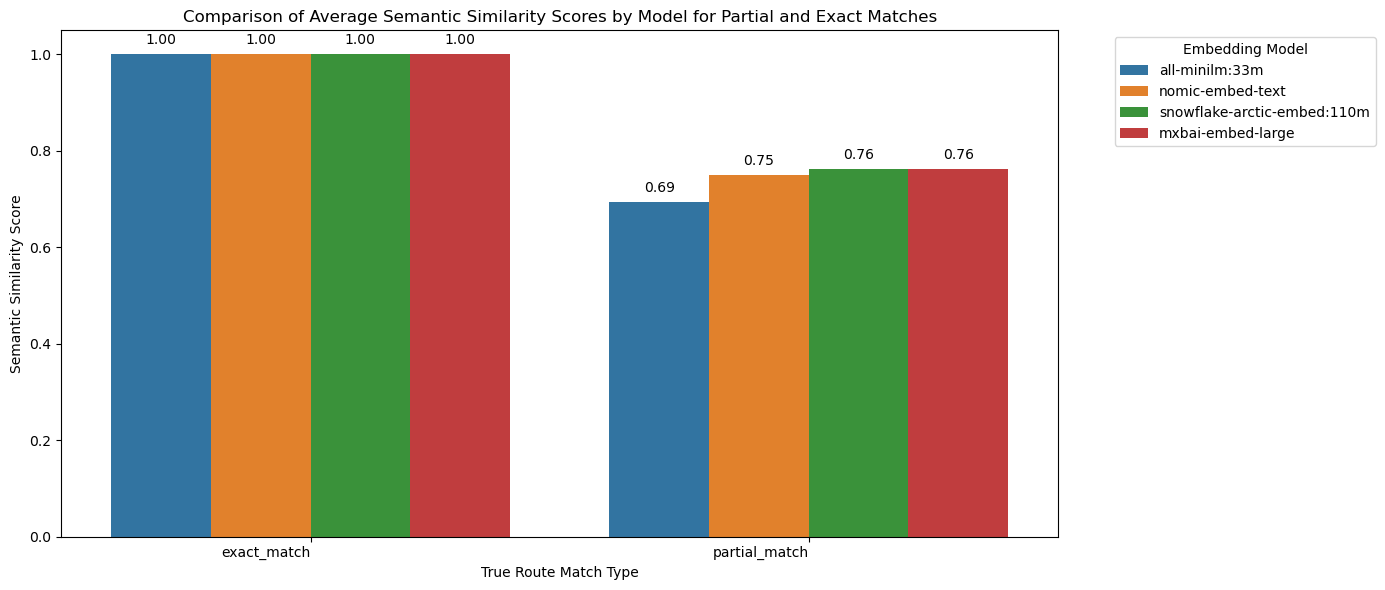

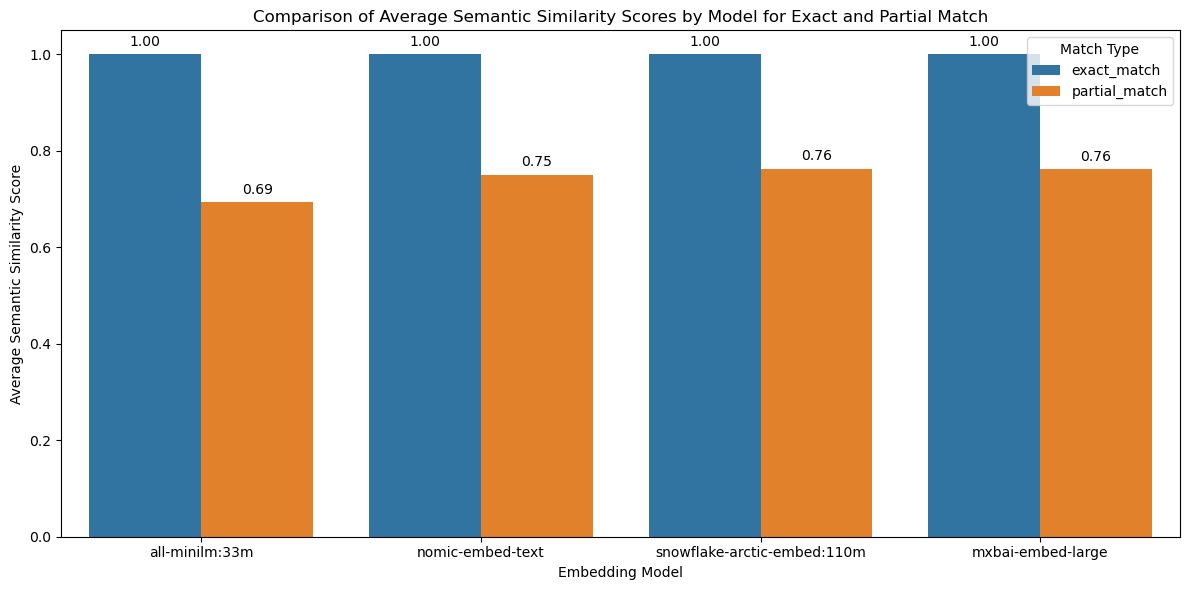

In [2]:
# Filter the data to include only 'partial_match'
filtered_data = df[df['true_route_match_type'].isin(['partial_match'])]

# Calculate average and standard deviation for each embed_model
stats = filtered_data.groupby('embed_model')['semantic_similarity_score'].agg(['mean', 'std']).reset_index()
stats['mean'] = stats['mean'].round(4)
stats['std'] = stats['std'].round(4)

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='true_route_match_type', y='semantic_similarity_score', hue='embed_model', data=filtered_data)

# Set the title and labels
plt.title('Comparison of Semantic Similarity Scores by Model for Partial Match')
plt.ylabel('Semantic Similarity Score')
plt.xlabel('True Route Match Type')

# Display the legend for embedding models
plt.legend(title='Embedding Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print the statistics
print("\nStatistics for each Embedding Model:")
print(stats.to_string(index=False))

# Calculate overall average and standard deviation
overall_stats = filtered_data['semantic_similarity_score'].agg(['mean', 'std']).round(4)
print("\nOverall Statistics:")
print(f"Average: {overall_stats['mean']}")
print(f"Standard Deviation: {overall_stats['std']}")


######################################################################
################## Same as above in bar chart


# Filter the data to exclude 'exact_match' and include only 'partial_match' (or 'None' if applicable)
filtered_data = df[df['true_route_match_type'].isin(['partial_match'])]  # You can add 'None' if applicable later

# Create the bar plot for the remaining match types
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='true_route_match_type', y='semantic_similarity_score', hue='embed_model', 
                 data=filtered_data, estimator=np.mean, errorbar=None)  # Added ci=None to remove error bars

# Function to add value labels on top of each bar
def add_value_labels(ax, spacing=5):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=spacing)

# Add value labels
add_value_labels(ax)

# Set the title and labels
plt.title('Comparison of Average Semantic Similarity Scores by Model for Partial Match')
plt.ylabel('Semantic Similarity Score')
plt.xlabel('True Route Match Type')

# Display the legend for embedding models
plt.legend(title='Embedding Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent cutting off labels and legend
plt.tight_layout()

# Show the plot
plt.show()



###########################
############################### Included exact_match


# Filter the data to include both 'partial_match' and 'exact_match'
filtered_data = df[df['true_route_match_type'].isin(['partial_match', 'exact_match'])]

# Create the bar plot for all match types
plt.figure(figsize=(14, 6))  # Increased figure size to accommodate more bars
ax = sns.barplot(x='true_route_match_type', y='semantic_similarity_score', hue='embed_model', 
                 data=filtered_data, estimator=np.mean, errorbar=None)

# Function to add value labels on top of each bar
def add_value_labels(ax, spacing=5):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=spacing)

# Add value labels
add_value_labels(ax)

# Set the title and labels
plt.title('Comparison of Average Semantic Similarity Scores by Model for Partial and Exact Matches')
plt.ylabel('Semantic Similarity Score')
plt.xlabel('True Route Match Type')

# Display the legend for embedding models
plt.legend(title='Embedding Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=0, ha='right')

# Adjust layout to prevent cutting off labels and legend
plt.tight_layout()

# Show the plot
plt.show()


#################################################

# Filter the data to include both 'exact_match' and 'partial_match'
filtered_data = df[df['true_route_match_type'].isin(['exact_match', 'partial_match'])]

# Create a bar plot with two bars for each model, one for exact_match and one for partial_match
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='embed_model', y='semantic_similarity_score', hue='true_route_match_type', errorbar=None, data=filtered_data, estimator=lambda x: sum(x) / len(x), edgecolor=None)

# Set the title and labels
plt.title('Comparison of Average Semantic Similarity Scores by Model for Exact and Partial Match')
plt.ylabel('Average Semantic Similarity Score')
plt.xlabel('Embedding Model')

# Display values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Display the legend inside the chart area
plt.legend(title='Match Type', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

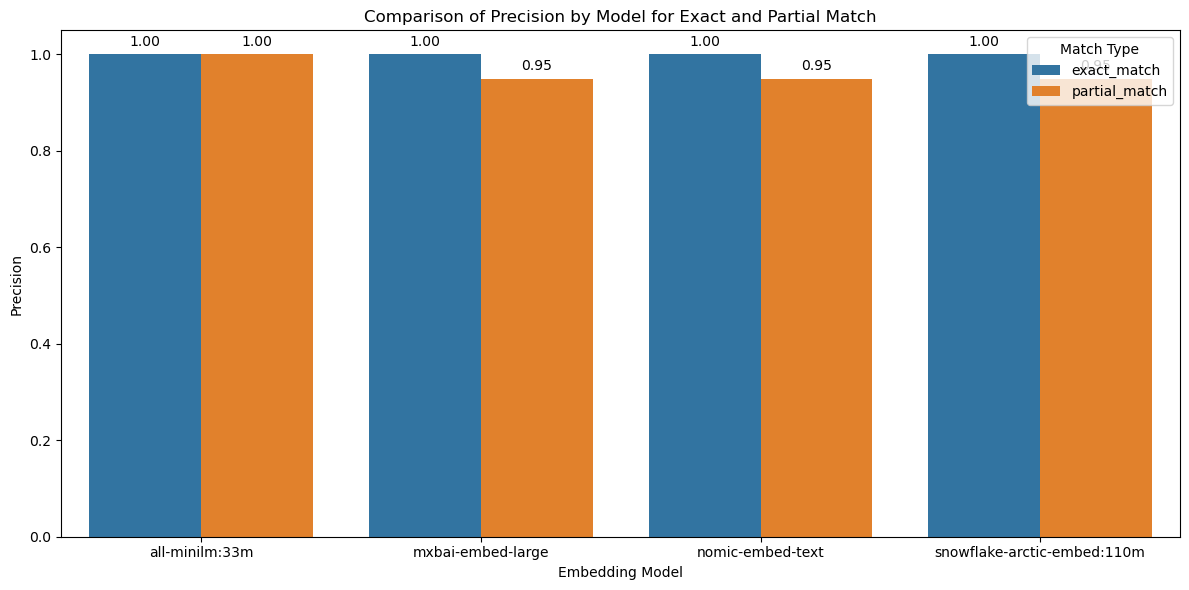

In [3]:
# Define a function to calculate precision for each model and match type
def calculate_precision(df, match_type):
    precision_results = []
    # Filter data by match type
    filtered_df = df[df['true_route_match_type'] == match_type]
    # Group by embedding model
    grouped = filtered_df.groupby('embed_model')
    for model, group in grouped:
        # Calculate precision (True Positive / (True Positive + False Positive))
        precision = precision_score(group['route_select_correctness'], [1] * len(group))  # assuming true labels as all 1's
        precision_results.append({'embed_model': model, 'true_route_match_type': match_type, 'precision': precision})
    return precision_results

# Combine results for exact and partial match
precision_exact = calculate_precision(df, 'exact_match')
precision_partial = calculate_precision(df, 'partial_match')
precision_data = precision_exact + precision_partial

# Convert the list of dictionaries to a DataFrame
precision_df = pd.DataFrame(precision_data)

# Create a bar plot with two bars for each model, one for exact_match and one for partial_match
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='embed_model', y='precision', hue='true_route_match_type', data=precision_df, edgecolor=None)

# Set the title and labels
plt.title('Comparison of Precision by Model for Exact and Partial Match')
plt.ylabel('Precision')
plt.xlabel('Embedding Model')

# Display values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Display the legend inside the chart area
plt.legend(title='Match Type', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

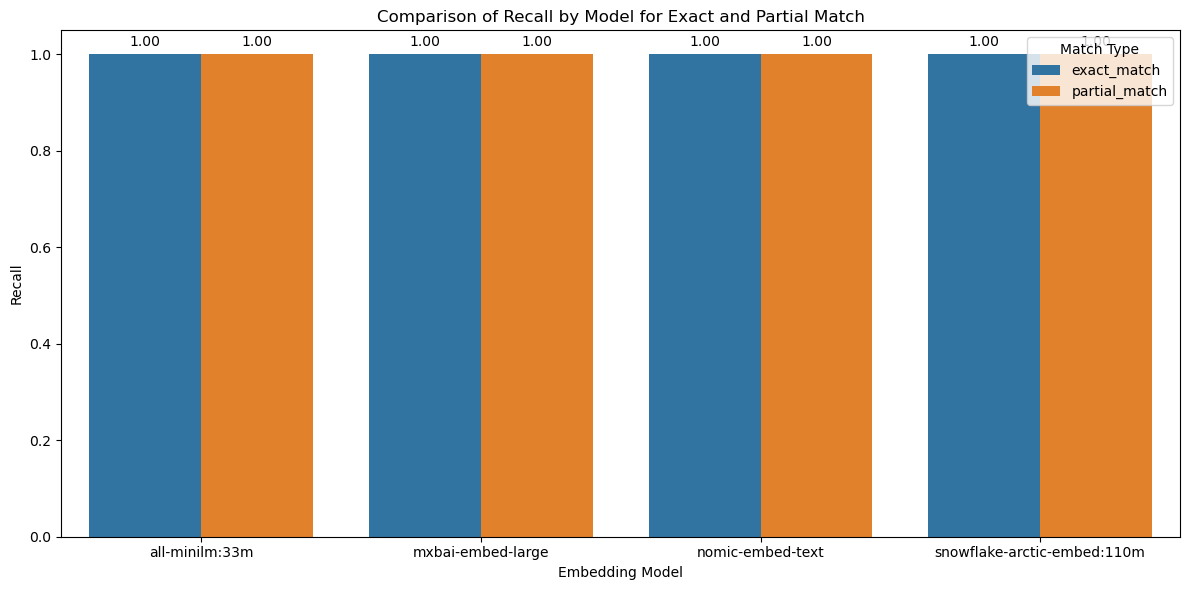

In [4]:
# Define a function to calculate recall for each model and match type
def calculate_recall(df, match_type):
    recall_results = []
    # Filter data by match type
    filtered_df = df[df['true_route_match_type'] == match_type]
    # Group by embedding model
    grouped = filtered_df.groupby('embed_model')
    for model, group in grouped:
        y_true = group['route_select_correctness']
        y_pred = [1] * len(group)  # Assume predicted values are all 1 (True Positive)
        # Calculate recall
        recall = recall_score(y_true, y_pred)
        recall_results.append({'embed_model': model, 'true_route_match_type': match_type, 'recall': recall})
    return recall_results

# Combine results for exact and partial match
recall_exact = calculate_recall(df, 'exact_match')
recall_partial = calculate_recall(df, 'partial_match')
recall_data = recall_exact + recall_partial

# Convert the list of dictionaries to a DataFrame
recall_df = pd.DataFrame(recall_data)

# Create a bar plot with two bars for each model, one for exact_match and one for partial_match
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='embed_model', y='recall', hue='true_route_match_type', data=recall_df, edgecolor=None)

# Set the title and labels
plt.title('Comparison of Recall by Model for Exact and Partial Match')
plt.ylabel('Recall')
plt.xlabel('Embedding Model')

# Display values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Display the legend inside the chart area
plt.legend(title='Match Type', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

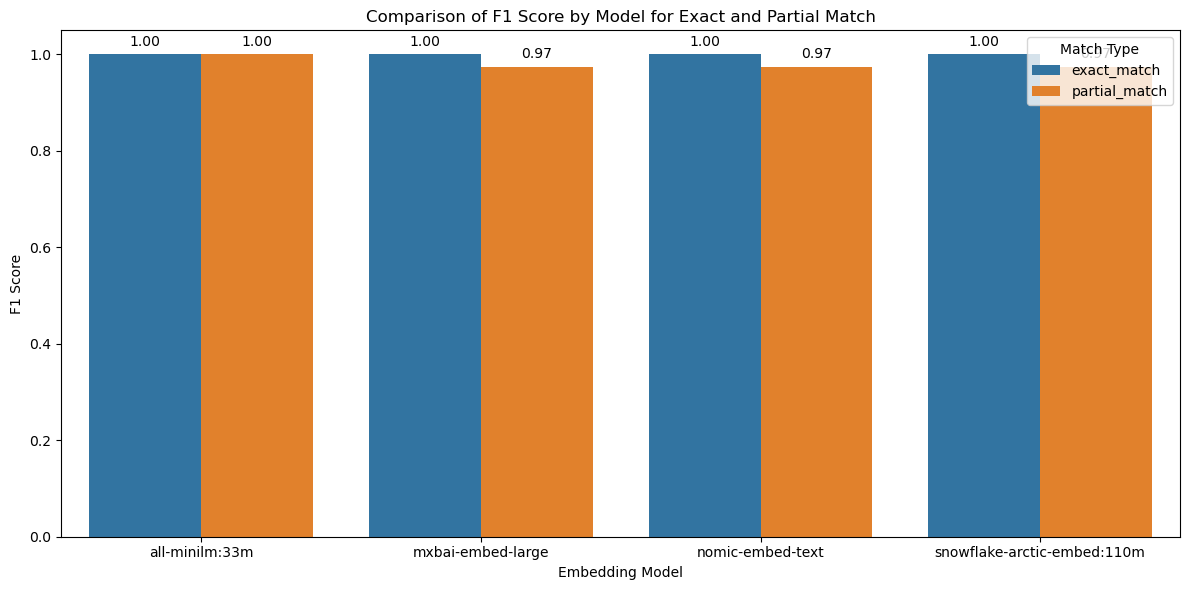

In [5]:
# Define a function to calculate F1 score for each model and match type
def calculate_f1(df, match_type):
    f1_results = []
    # Filter data by match type
    filtered_df = df[df['true_route_match_type'] == match_type]
    # Group by embedding model
    grouped = filtered_df.groupby('embed_model')
    for model, group in grouped:
        y_true = group['route_select_correctness']
        y_pred = [1] * len(group)  # Assume predicted values are all 1 (True Positive)
        # Calculate F1 score
        f1 = f1_score(y_true, y_pred)
        f1_results.append({'embed_model': model, 'true_route_match_type': match_type, 'f1': f1})
    return f1_results

# Combine results for exact and partial match
f1_exact = calculate_f1(df, 'exact_match')
f1_partial = calculate_f1(df, 'partial_match')
f1_data = f1_exact + f1_partial

# Convert the list of dictionaries to a DataFrame
f1_df = pd.DataFrame(f1_data)

# Create a bar plot with two bars for each model, one for exact_match and one for partial_match
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='embed_model', y='f1', hue='true_route_match_type', data=f1_df, edgecolor=None)

# Set the title and labels
plt.title('Comparison of F1 Score by Model for Exact and Partial Match')
plt.ylabel('F1 Score')
plt.xlabel('Embedding Model')

# Display values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Display the legend inside the chart area
plt.legend(title='Match Type', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


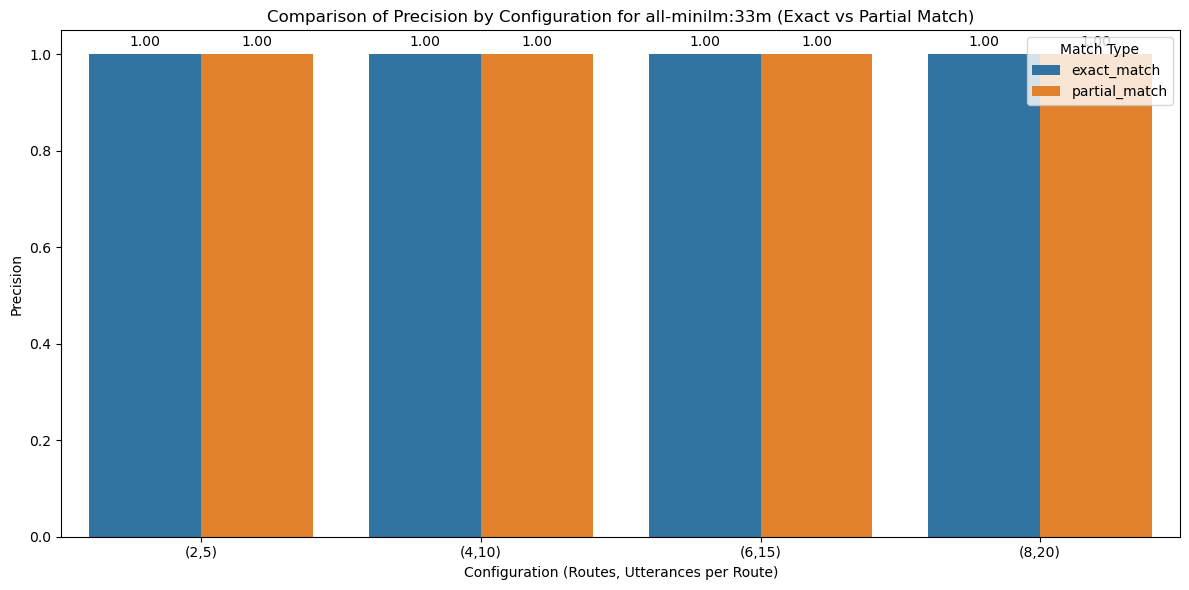

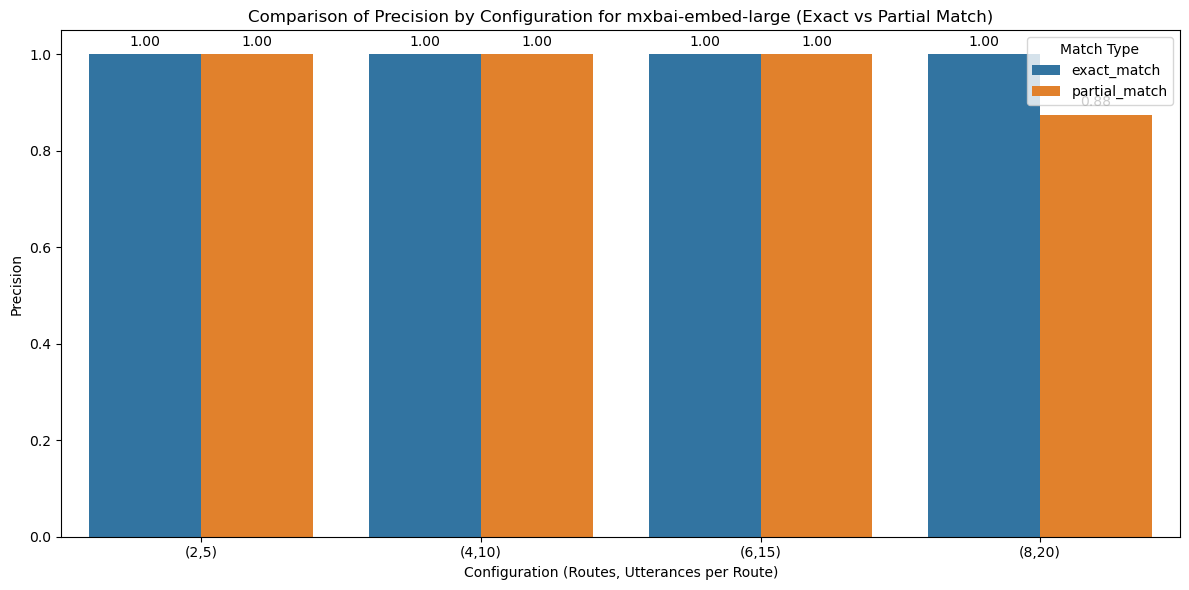

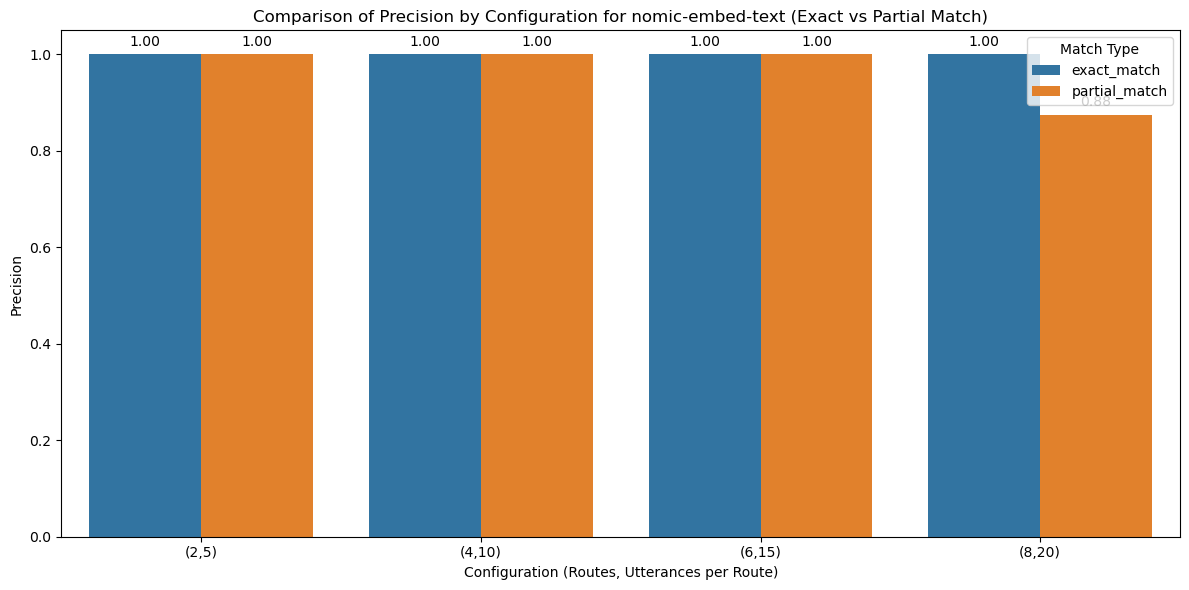

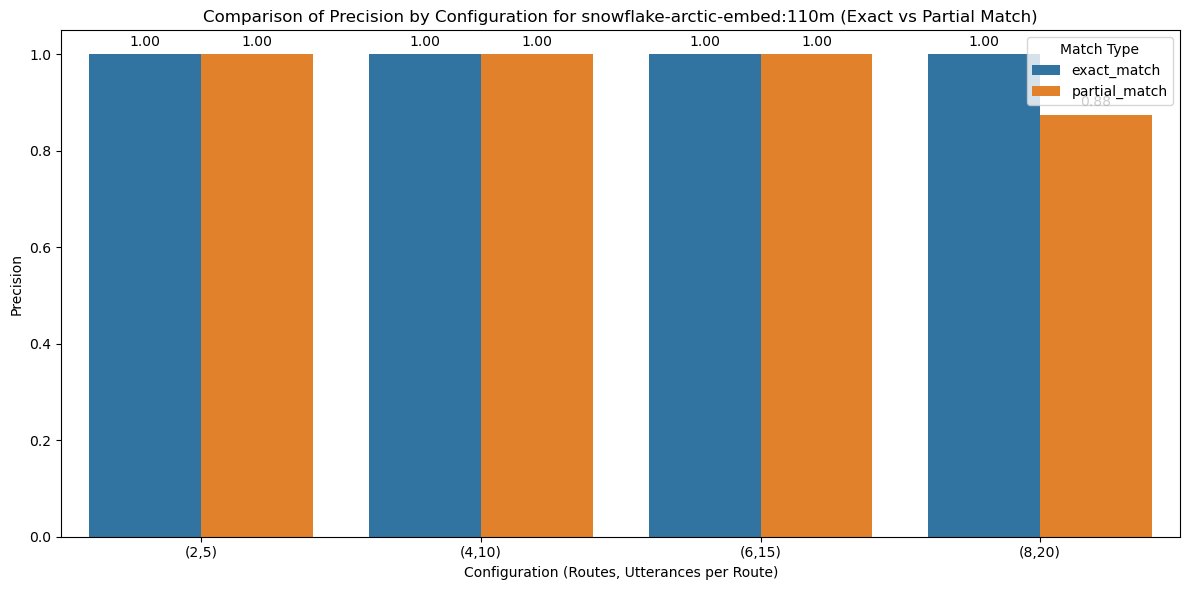

In [6]:
# Define a function to calculate precision for each model, configuration, and match type
def calculate_precision_by_config(df, match_type):
    precision_results = []
    # Filter data by match type
    filtered_df = df[df['true_route_match_type'] == match_type]
    # Group by embed_model, routes, and utterances_per_route (configuration)
    grouped = filtered_df.groupby(['embed_model', 'routes', 'utterances_per_route'])
    for (model, routes, utterances_per_route), group in grouped:
        y_true = group['route_select_correctness']
        y_pred = [1] * len(group)  # Assume predicted values are all 1 (True Positive)
        # Calculate precision
        precision = precision_score(y_true, y_pred)
        # Combine routes and utterances_per_route into a configuration string
        configuration = f'({routes},{utterances_per_route})'
        precision_results.append({'embed_model': model, 'configuration': configuration,
                                  'true_route_match_type': match_type, 'precision': precision})
    return precision_results

# Combine results for exact and partial match
precision_exact = calculate_precision_by_config(df, 'exact_match')
precision_partial = calculate_precision_by_config(df, 'partial_match')
precision_data = precision_exact + precision_partial

# Convert the list of dictionaries to a DataFrame
precision_df = pd.DataFrame(precision_data)

# Plot precision for each embedding model, grouped by configuration
models = precision_df['embed_model'].unique()

for model in models:
    model_data = precision_df[precision_df['embed_model'] == model]
    
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(x='configuration', y='precision', hue='true_route_match_type', data=model_data, 
                           dodge=True, errorbar=None)
    
    # Set the title and labels
    plt.title(f'Comparison of Precision by Configuration for {model} (Exact vs Partial Match)')
    plt.ylabel('Precision')
    plt.xlabel('Configuration (Routes, Utterances per Route)')
    
    # Display values on top of each bar
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 9), textcoords='offset points')

    # Display the legend inside the chart area
    plt.legend(title='Match Type', loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()


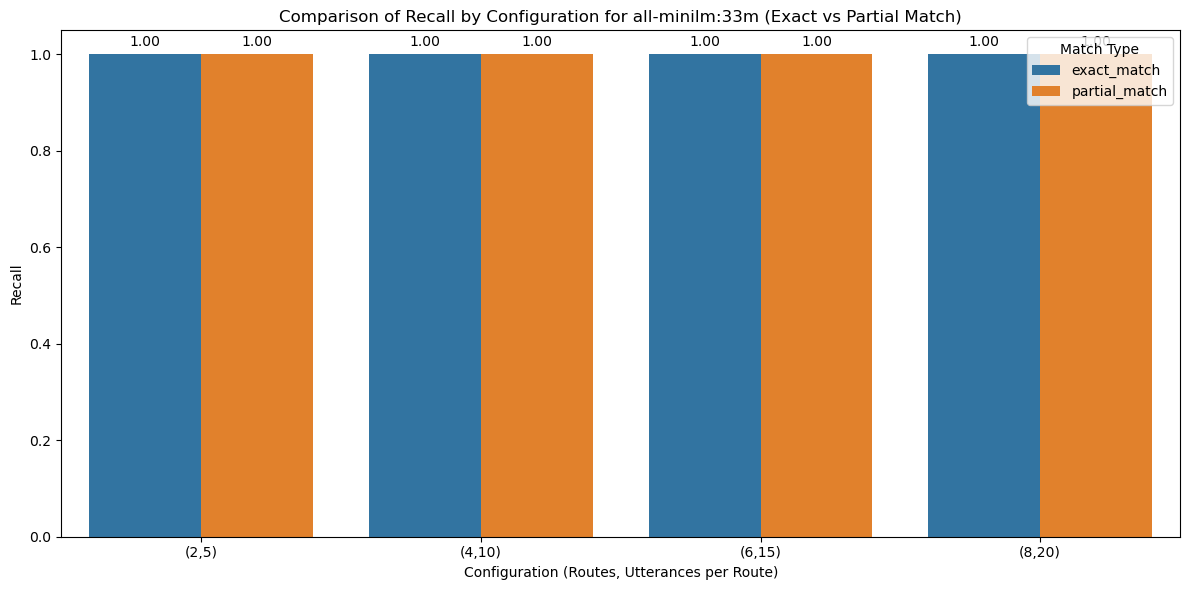

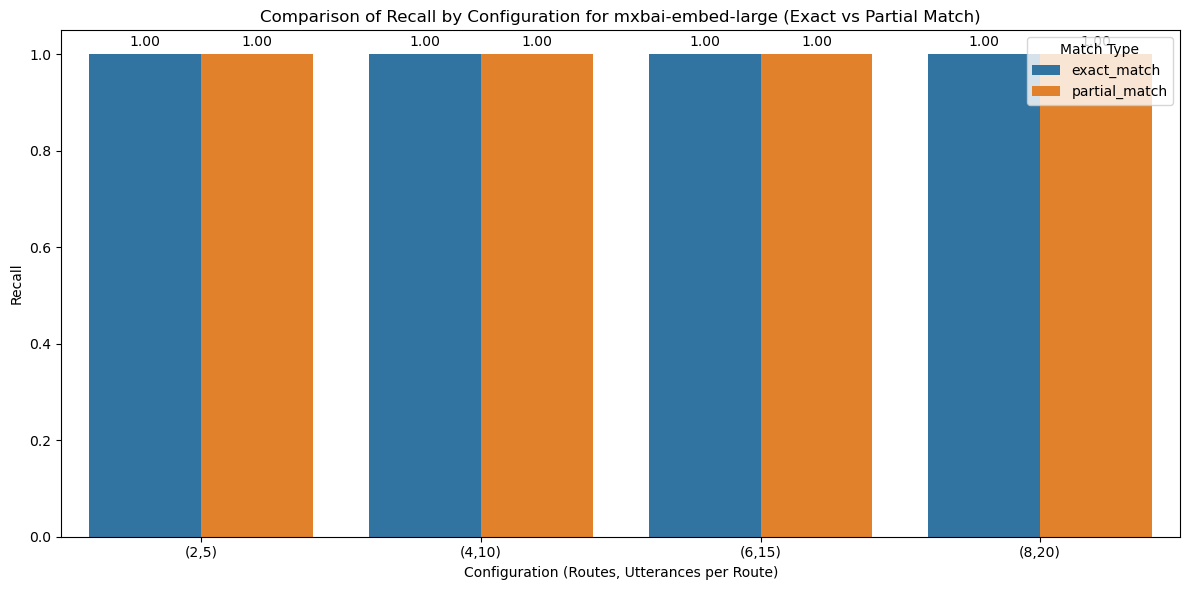

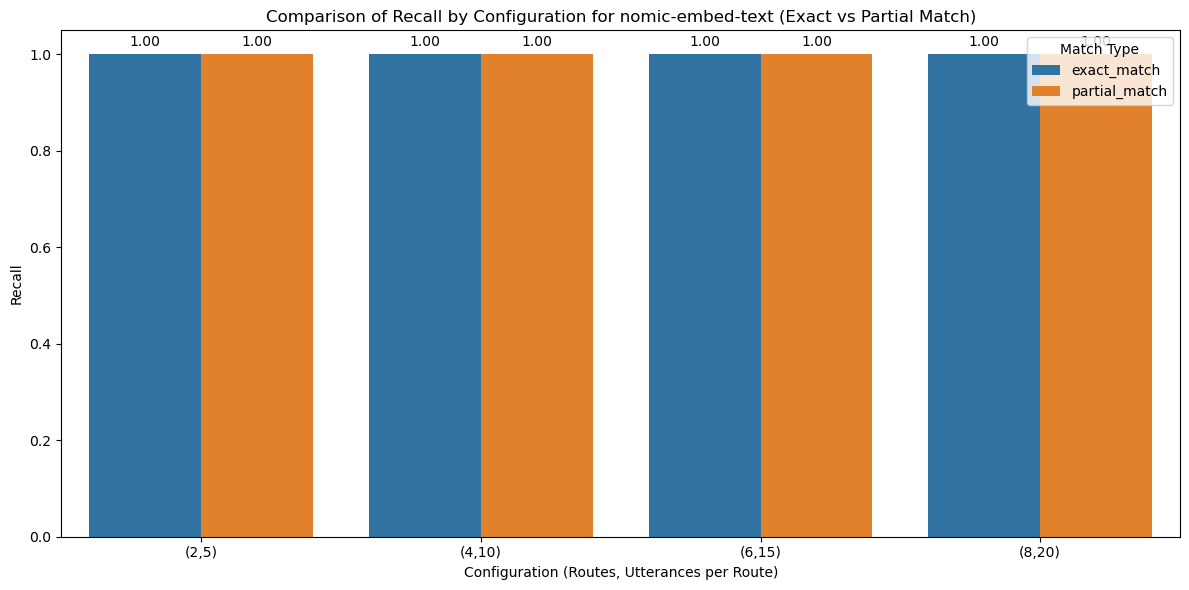

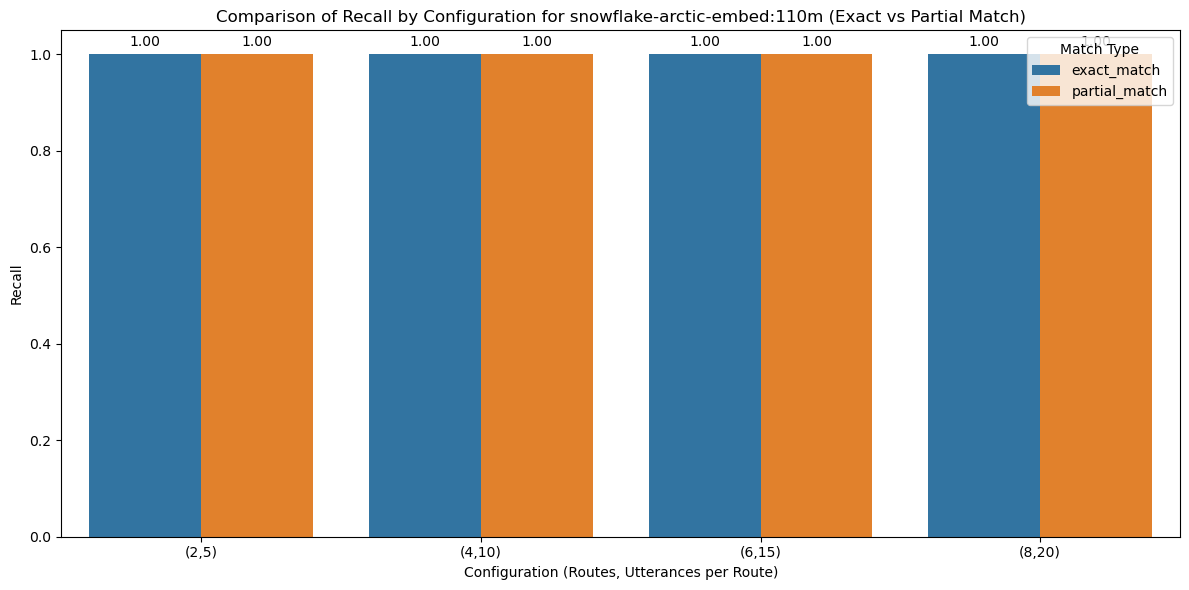

In [7]:
# Define a function to calculate recall for each model, configuration, and match type
def calculate_recall_by_config(df, match_type):
    recall_results = []
    # Filter data by match type
    filtered_df = df[df['true_route_match_type'] == match_type]
    # Group by embed_model, routes, and utterances_per_route (configuration)
    grouped = filtered_df.groupby(['embed_model', 'routes', 'utterances_per_route'])
    for (model, routes, utterances_per_route), group in grouped:
        y_true = group['route_select_correctness']
        y_pred = [1] * len(group)  # Assume predicted values are all 1 (True Positive)
        # Calculate recall
        recall = recall_score(y_true, y_pred)
        # Combine routes and utterances_per_route into a configuration string
        configuration = f'({routes},{utterances_per_route})'
        recall_results.append({'embed_model': model, 'configuration': configuration,
                               'true_route_match_type': match_type, 'recall': recall})
    return recall_results

# Combine results for exact and partial match
recall_exact = calculate_recall_by_config(df, 'exact_match')
recall_partial = calculate_recall_by_config(df, 'partial_match')
recall_data = recall_exact + recall_partial

# Convert the list of dictionaries to a DataFrame
recall_df = pd.DataFrame(recall_data)

# Plot recall for each embedding model, grouped by configuration
models = recall_df['embed_model'].unique()

for model in models:
    model_data = recall_df[recall_df['embed_model'] == model]
    
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(x='configuration', y='recall', hue='true_route_match_type', data=model_data, 
                           dodge=True, errorbar=None)
    
    # Set the title and labels
    plt.title(f'Comparison of Recall by Configuration for {model} (Exact vs Partial Match)')
    plt.ylabel('Recall')
    plt.xlabel('Configuration (Routes, Utterances per Route)')
    
    # Display values on top of each bar
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 9), textcoords='offset points')

    # Display the legend inside the chart area
    plt.legend(title='Match Type', loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()


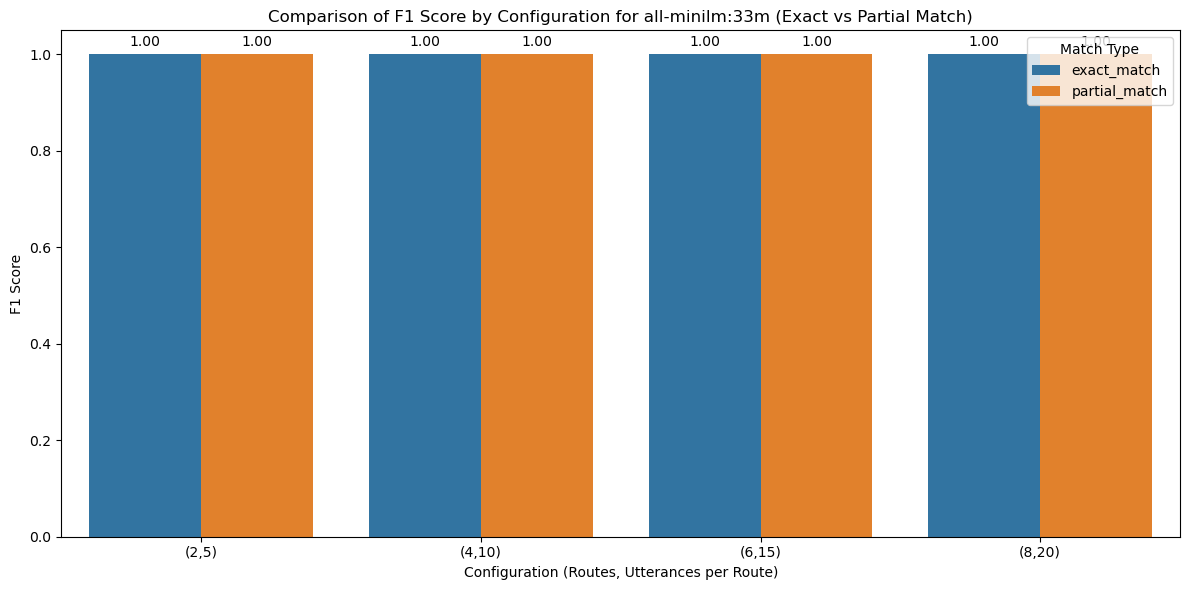

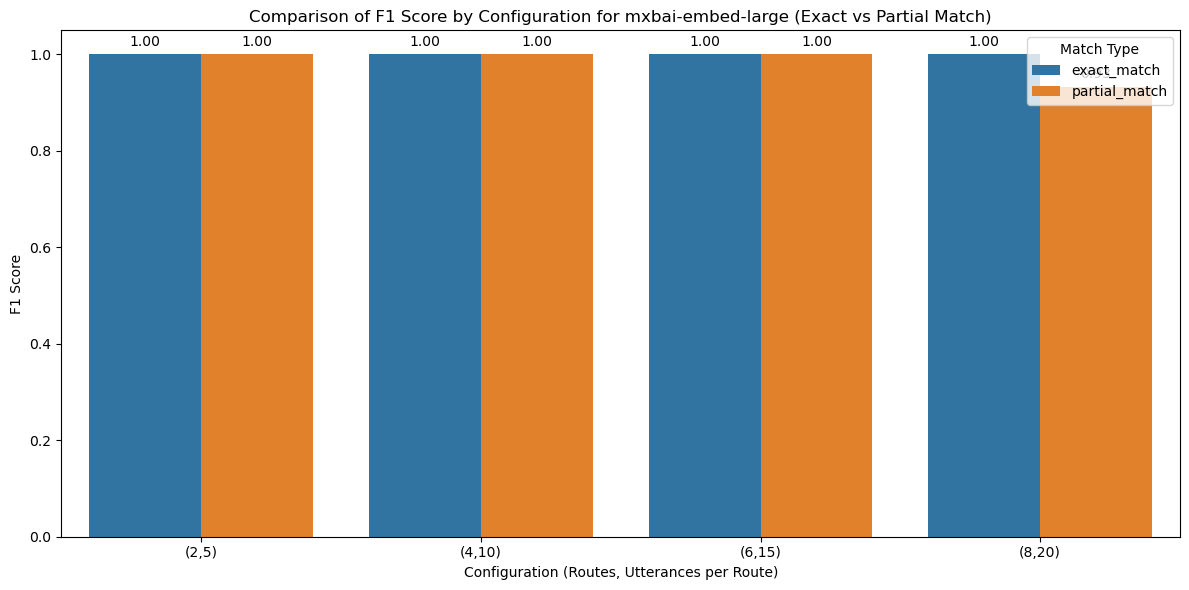

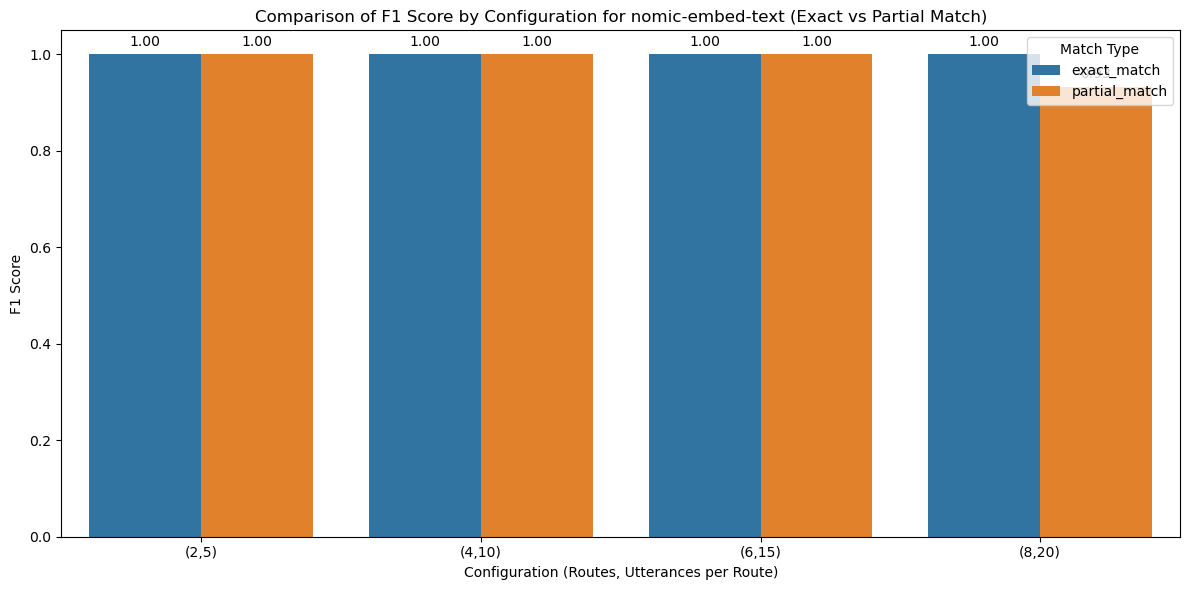

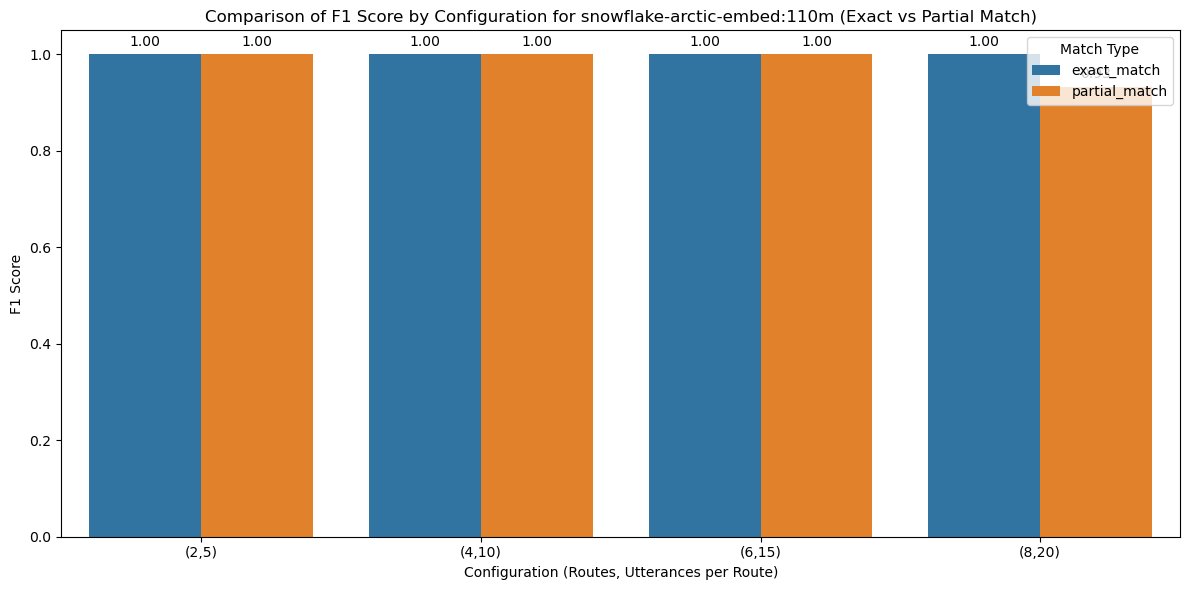

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Define a function to calculate F1 score for each model, configuration, and match type
def calculate_f1_by_config(df, match_type):
    f1_results = []
    # Filter data by match type
    filtered_df = df[df['true_route_match_type'] == match_type]
    # Group by embed_model, routes, and utterances_per_route (configuration)
    grouped = filtered_df.groupby(['embed_model', 'routes', 'utterances_per_route'])
    for (model, routes, utterances_per_route), group in grouped:
        y_true = group['route_select_correctness']
        y_pred = [1] * len(group)  # Assume predicted values are all 1 (True Positive)
        # Calculate F1 score
        f1 = f1_score(y_true, y_pred)
        # Combine routes and utterances_per_route into a configuration string
        configuration = f'({routes},{utterances_per_route})'
        f1_results.append({'embed_model': model, 'configuration': configuration,
                           'true_route_match_type': match_type, 'f1': f1})
    return f1_results

# Combine results for exact and partial match
f1_exact = calculate_f1_by_config(df, 'exact_match')
f1_partial = calculate_f1_by_config(df, 'partial_match')
f1_data = f1_exact + f1_partial

# Convert the list of dictionaries to a DataFrame
f1_df = pd.DataFrame(f1_data)

# Plot F1 score for each embedding model, grouped by configuration
models = f1_df['embed_model'].unique()

for model in models:
    model_data = f1_df[f1_df['embed_model'] == model]
    
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(x='configuration', y='f1', hue='true_route_match_type', data=model_data, 
                           dodge=True, errorbar=None)
    
    # Set the title and labels
    plt.title(f'Comparison of F1 Score by Configuration for {model} (Exact vs Partial Match)')
    plt.ylabel('F1 Score')
    plt.xlabel('Configuration (Routes, Utterances per Route)')
    
    # Display values on top of each bar
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 9), textcoords='offset points')

    # Display the legend inside the chart area
    plt.legend(title='Match Type', loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()


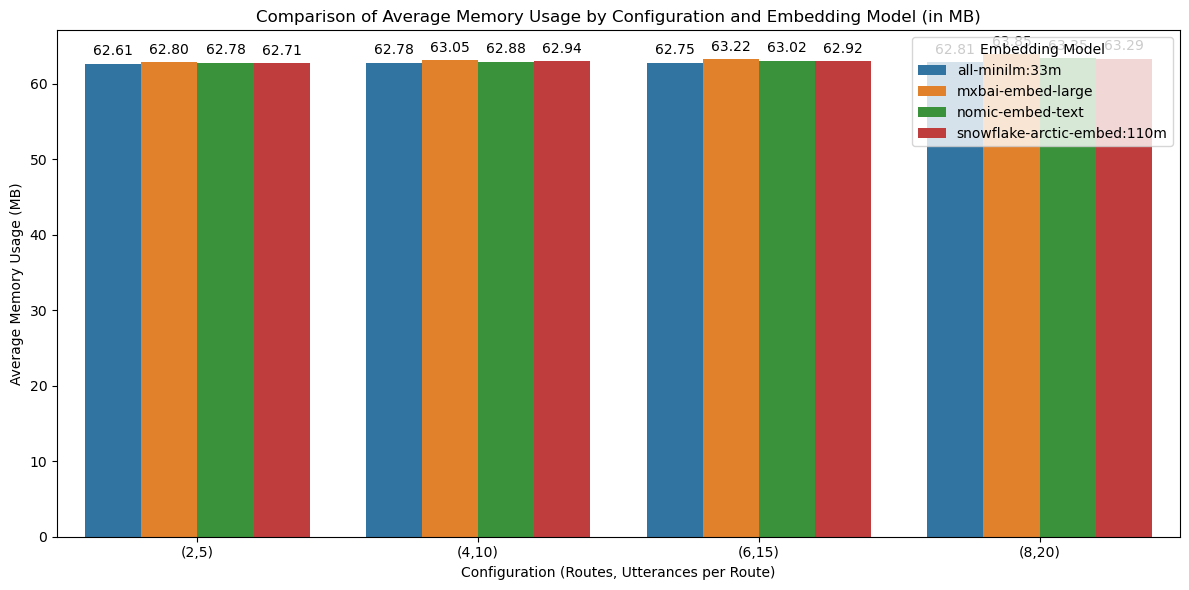

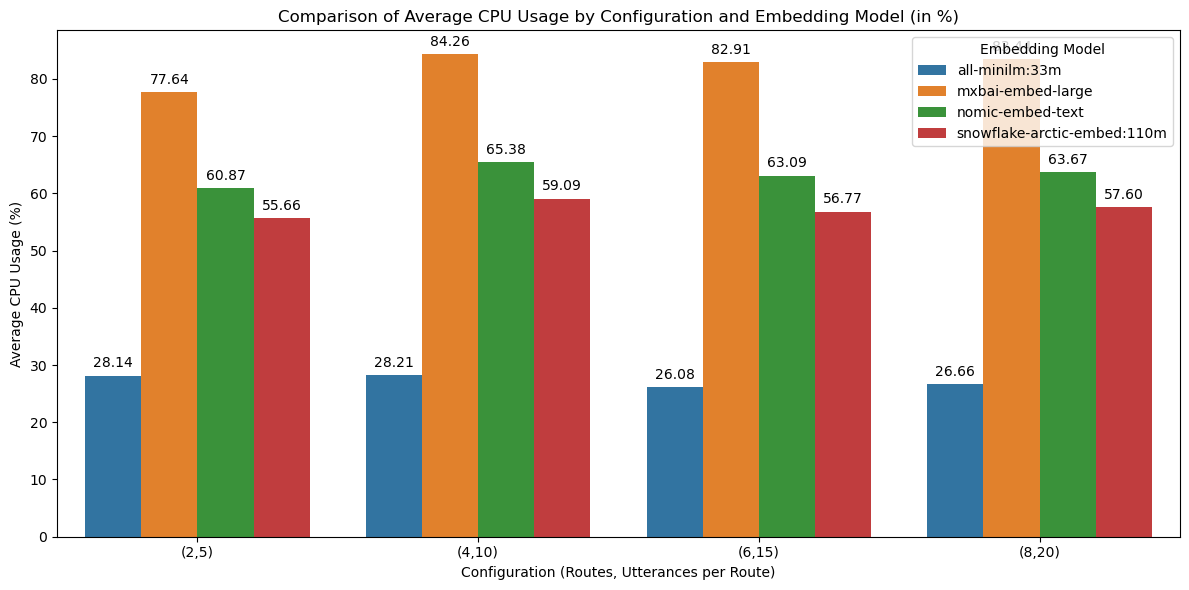

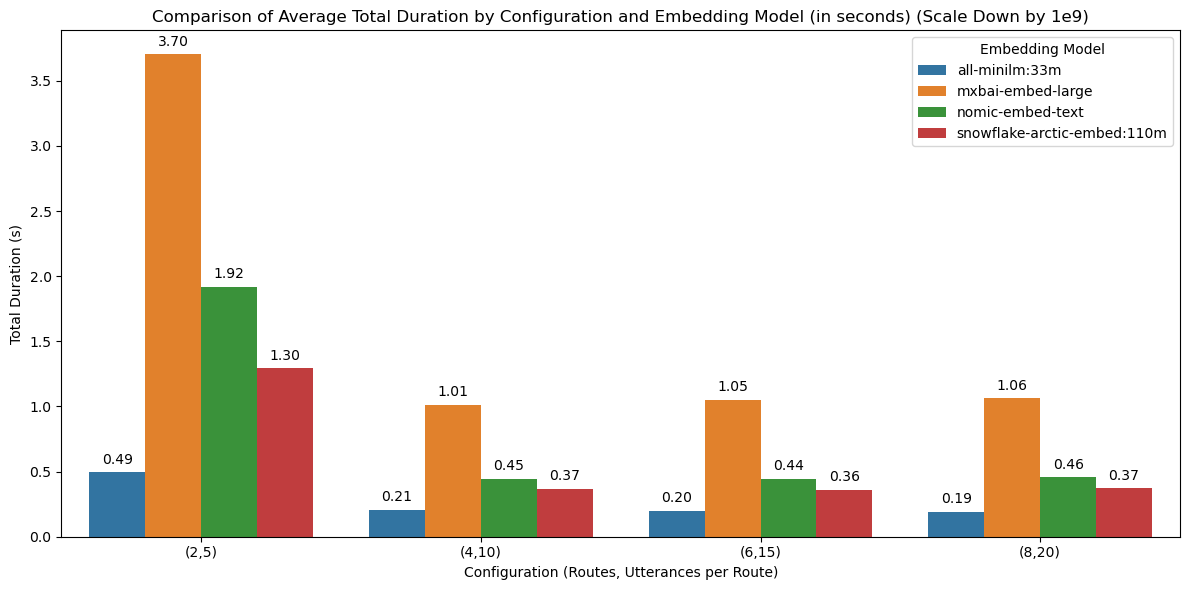

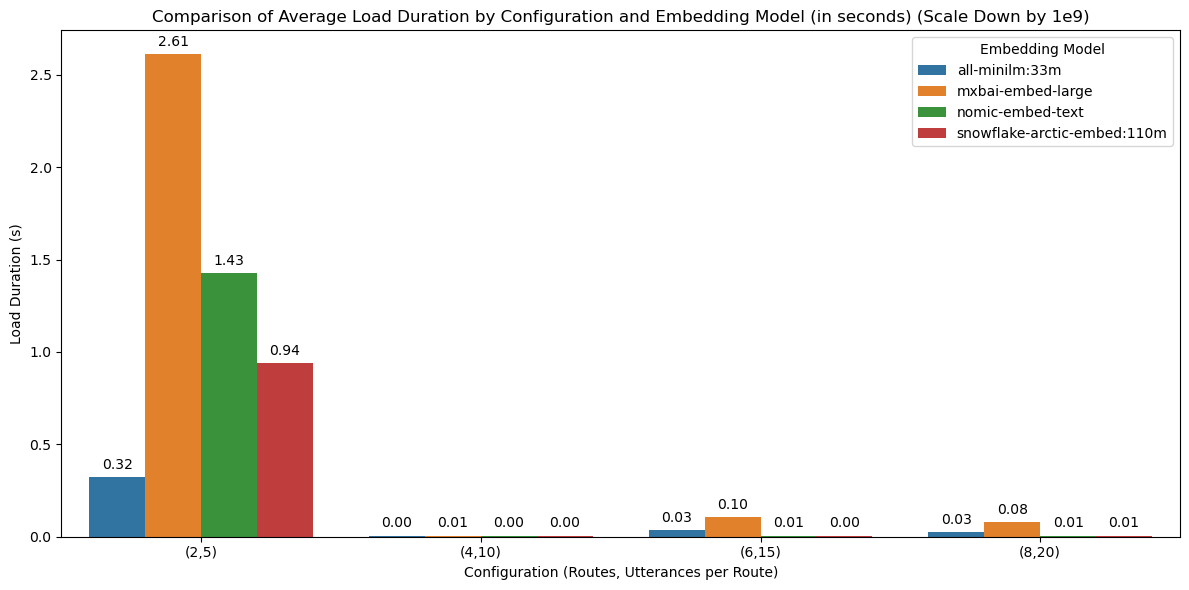

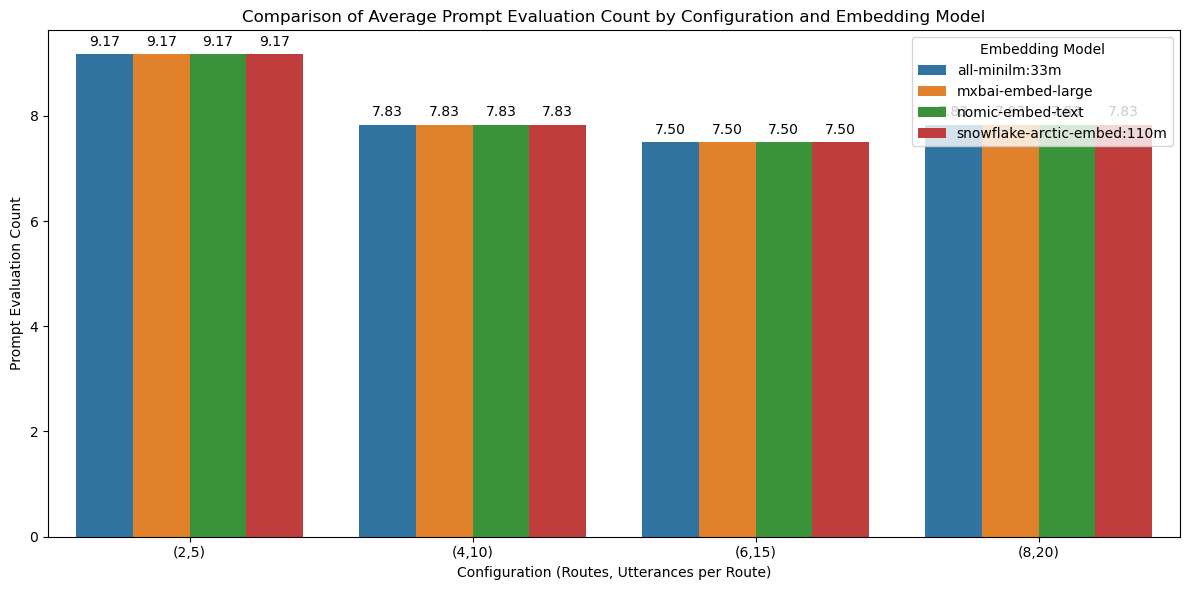

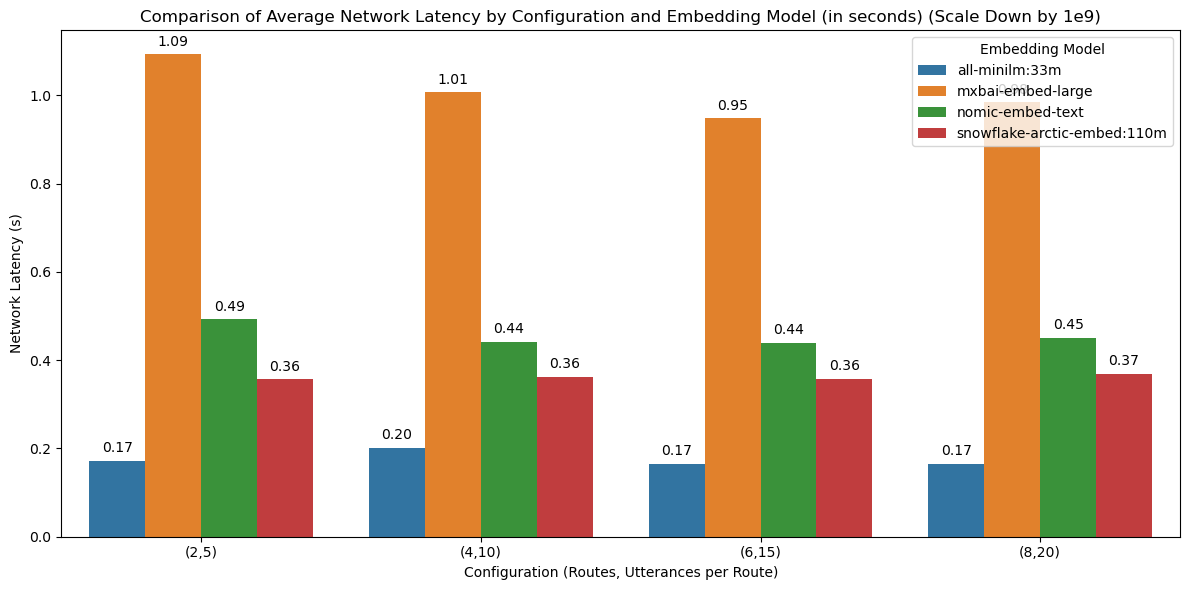

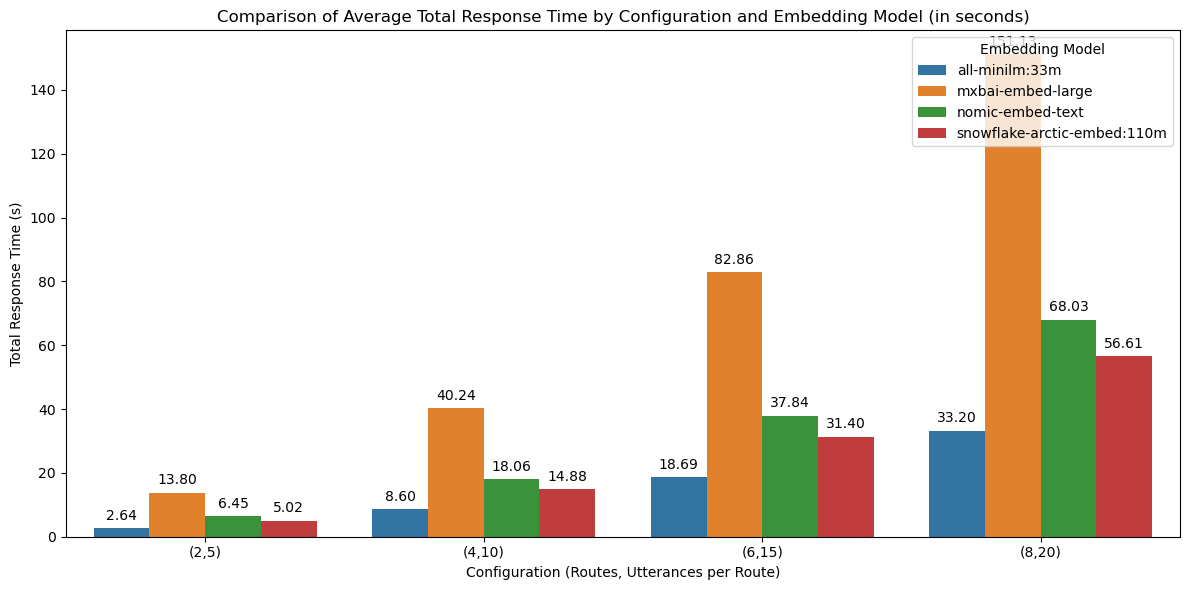

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average memory, CPU usage, and other metrics by configuration and model
metrics_data = df.groupby(['embed_model', 'routes', 'utterances_per_route']).agg({
    'memory_usage_mb': 'mean',
    'avg_cpu_usage_during': 'mean',
    'total_duration': 'mean',
    'load_duration': 'mean',
    'prompt_eval_count': 'mean',
    'network_latency': 'mean',
    'total_response_time': 'mean'
}).reset_index()

# Create a configuration label
metrics_data['configuration'] = metrics_data.apply(lambda row: f'({row["routes"]},{row["utterances_per_route"]})', axis=1)

# Scale down the values for total_duration, load_duration, and network_latency by 1e9 (ns to s)
metrics_data['total_duration_sec'] = metrics_data['total_duration'] / 1e9
metrics_data['load_duration_sec'] = metrics_data['load_duration'] / 1e9
metrics_data['network_latency_sec'] = metrics_data['network_latency'] / 1e9

# Plot Memory Usage
plt.figure(figsize=(12, 6))
sns.barplot(x='configuration', y='memory_usage_mb', hue='embed_model', data=metrics_data, dodge=True, errorbar=None)
plt.title('Comparison of Average Memory Usage by Configuration and Embedding Model (in MB)')
plt.ylabel('Average Memory Usage (MB)')
plt.xlabel('Configuration (Routes, Utterances per Route)')
plt.xticks(rotation=0)

# Display values on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), textcoords='offset points')

plt.legend(title='Embedding Model', loc='upper right')
plt.tight_layout()
plt.show()

# Plot CPU Usage
plt.figure(figsize=(12, 6))
sns.barplot(x='configuration', y='avg_cpu_usage_during', hue='embed_model', data=metrics_data, dodge=True, errorbar=None)
plt.title('Comparison of Average CPU Usage by Configuration and Embedding Model (in %)')
plt.ylabel('Average CPU Usage (%)')
plt.xlabel('Configuration (Routes, Utterances per Route)')
plt.xticks(rotation=0)

# Display values on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), textcoords='offset points')

plt.legend(title='Embedding Model', loc='upper right')
plt.tight_layout()
plt.show()

# Plot Total Duration (in seconds)
plt.figure(figsize=(12, 6))
sns.barplot(x='configuration', y='total_duration_sec', hue='embed_model', data=metrics_data, dodge=True, errorbar=None)
plt.title('Comparison of Average Total Duration by Configuration and Embedding Model (in seconds) (Scale Down by 1e9)')
plt.ylabel('Total Duration (s)')
plt.xlabel('Configuration (Routes, Utterances per Route)')
plt.xticks(rotation=0)

# Display scaled values (in seconds) on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), textcoords='offset points')

plt.legend(title='Embedding Model', loc='upper right')
plt.tight_layout()
plt.show()

# Plot Load Duration (in seconds)
plt.figure(figsize=(12, 6))
sns.barplot(x='configuration', y='load_duration_sec', hue='embed_model', data=metrics_data, dodge=True, errorbar=None)
plt.title('Comparison of Average Load Duration by Configuration and Embedding Model (in seconds) (Scale Down by 1e9)')
plt.ylabel('Load Duration (s)')
plt.xlabel('Configuration (Routes, Utterances per Route)')
plt.xticks(rotation=0)

# Display scaled values (in seconds) on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), textcoords='offset points')

plt.legend(title='Embedding Model', loc='upper right')
plt.tight_layout()
plt.show()

# Plot Prompt Evaluation Count
plt.figure(figsize=(12, 6))
sns.barplot(x='configuration', y='prompt_eval_count', hue='embed_model', data=metrics_data, dodge=True, errorbar=None)
plt.title('Comparison of Average Prompt Evaluation Count by Configuration and Embedding Model')
plt.ylabel('Prompt Evaluation Count')
plt.xlabel('Configuration (Routes, Utterances per Route)')
plt.xticks(rotation=0)

# Display values on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), textcoords='offset points')

plt.legend(title='Embedding Model', loc='upper right')
plt.tight_layout()
plt.show()

# Plot Network Latency (in seconds)
plt.figure(figsize=(12, 6))
sns.barplot(x='configuration', y='network_latency_sec', hue='embed_model', data=metrics_data, dodge=True, errorbar=None)
plt.title('Comparison of Average Network Latency by Configuration and Embedding Model (in seconds) (Scale Down by 1e9)')
plt.ylabel('Network Latency (s)')
plt.xlabel('Configuration (Routes, Utterances per Route)')
plt.xticks(rotation=0)

# Display scaled values (in seconds) on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), textcoords='offset points')

plt.legend(title='Embedding Model', loc='upper right')
plt.tight_layout()
plt.show()

# Plot Total Response Time (in seconds)
plt.figure(figsize=(12, 6))
sns.barplot(x='configuration', y='total_response_time', hue='embed_model', data=metrics_data, dodge=True, errorbar=None)
plt.title('Comparison of Average Total Response Time by Configuration and Embedding Model (in seconds)')
plt.ylabel('Total Response Time (s)')
plt.xlabel('Configuration (Routes, Utterances per Route)')
plt.xticks(rotation=0)

# Display values on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), textcoords='offset points')

plt.legend(title='Embedding Model', loc='upper right')
plt.tight_layout()
plt.show()


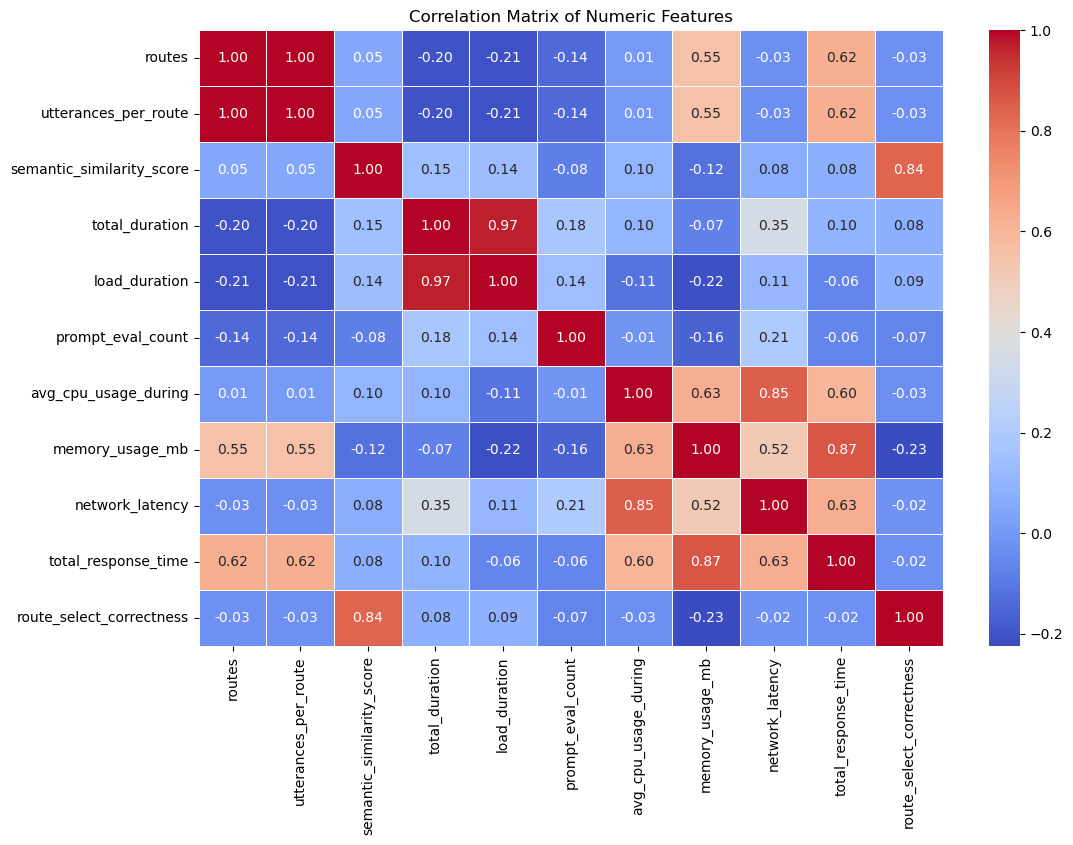

In [10]:
# Select numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

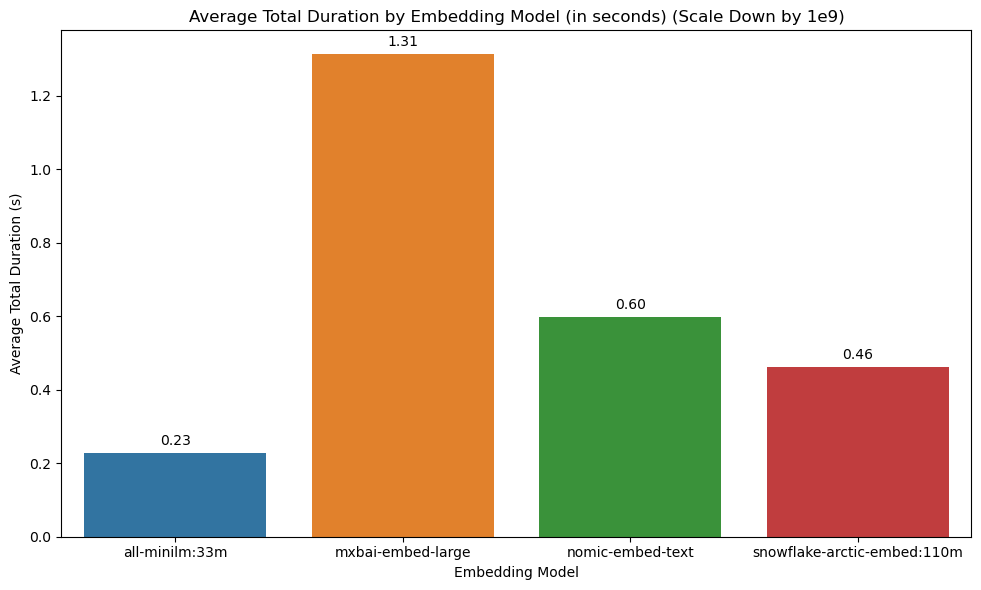

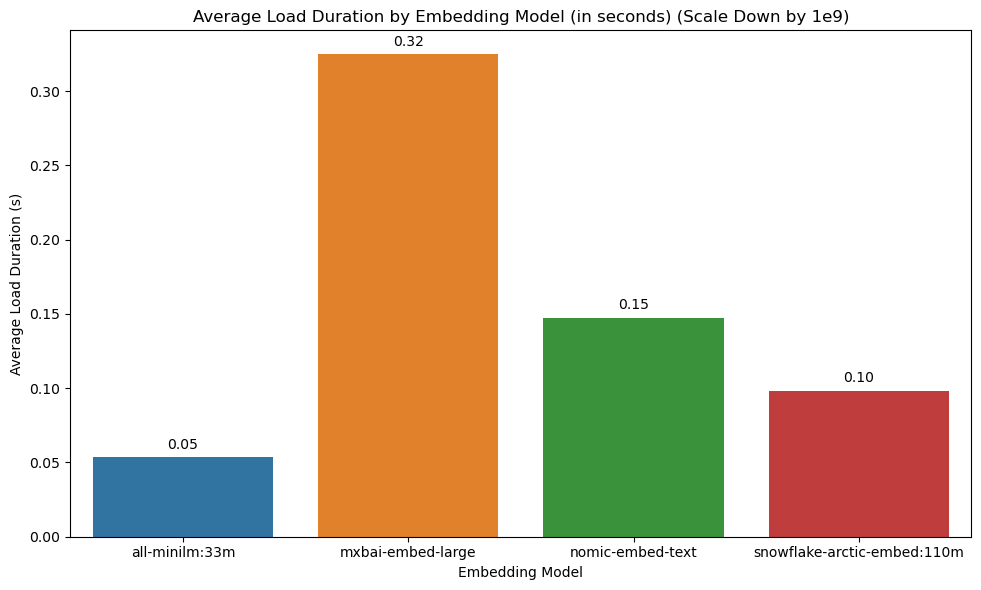

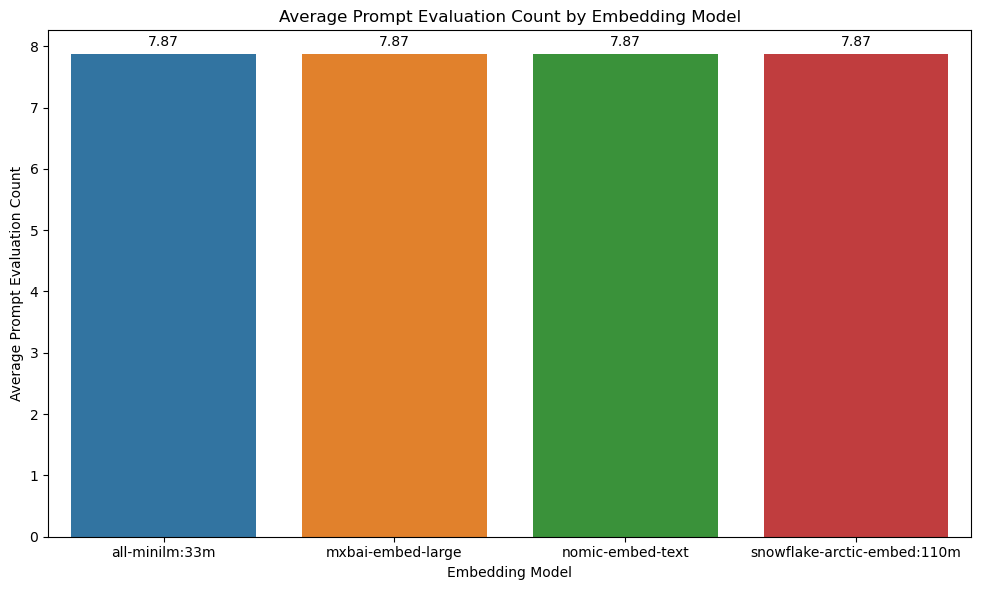

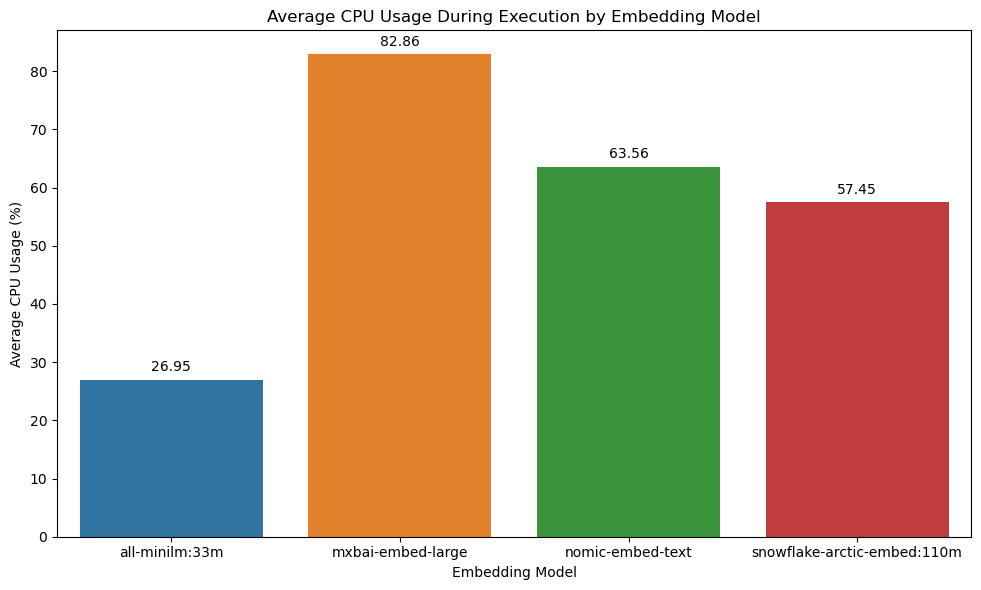

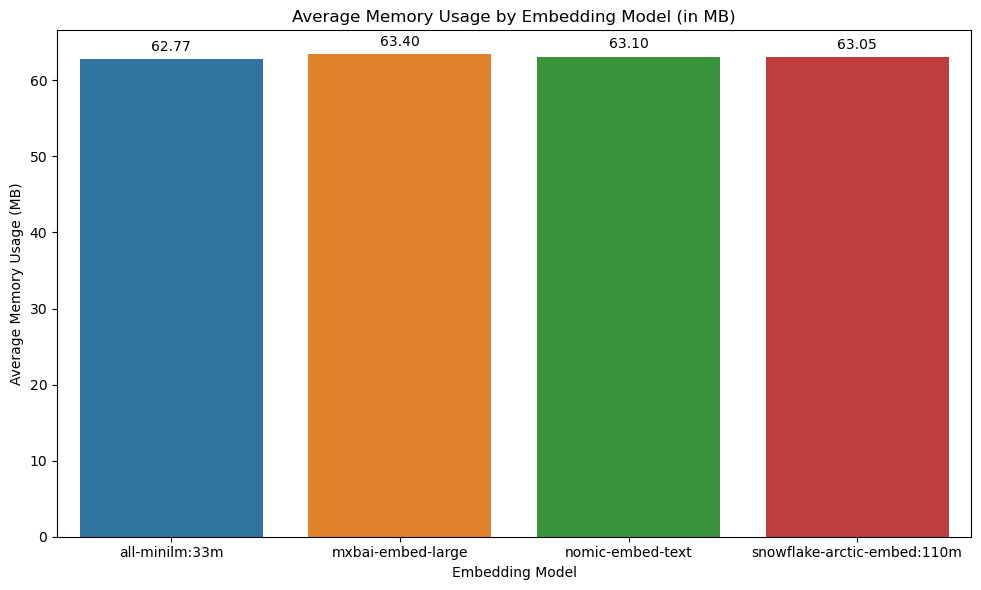

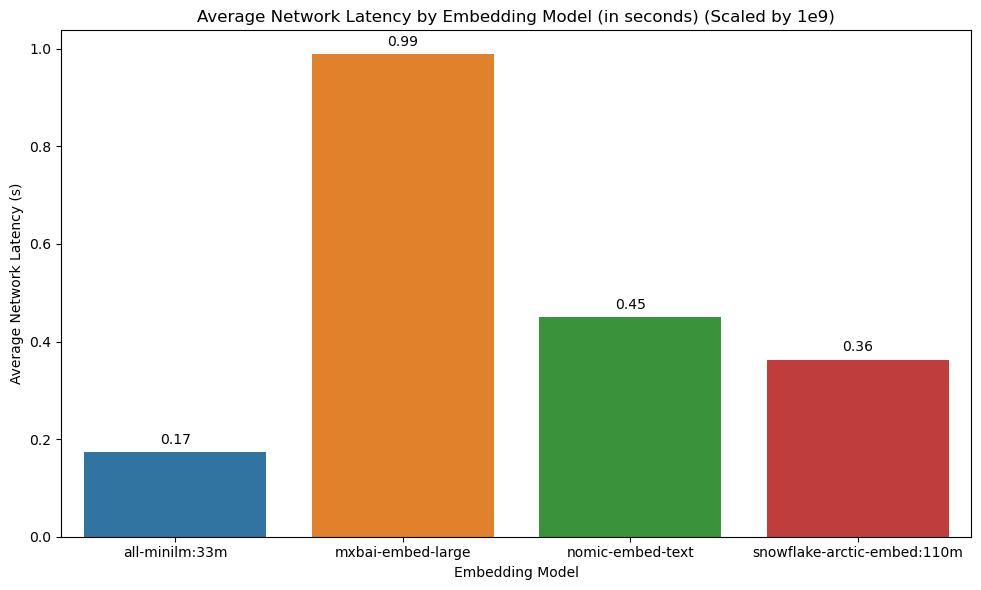

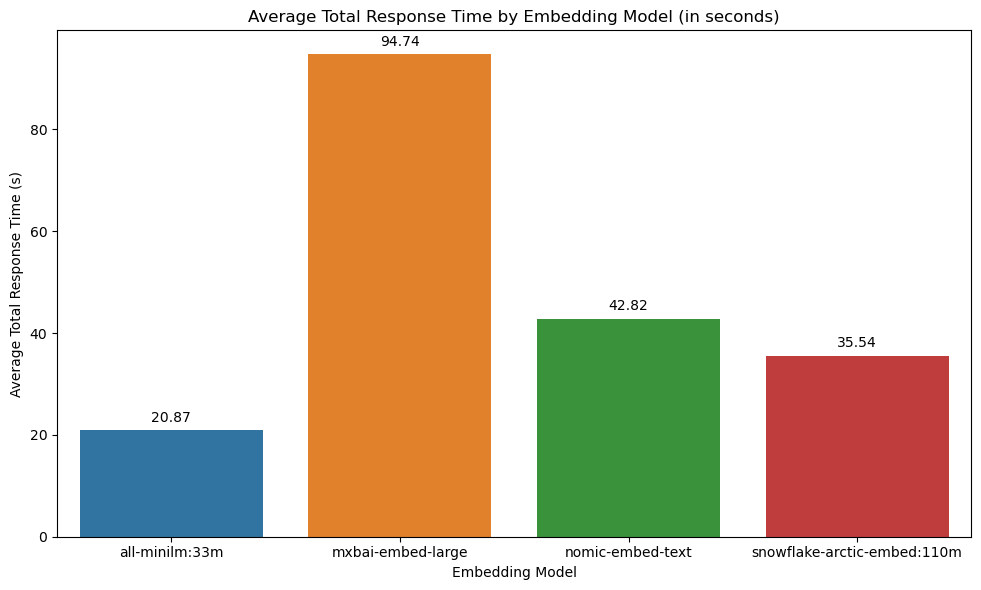

In [11]:
# 1. Plot for total_duration (scaled down by 1e9)
avg_total_duration = df.groupby('embed_model')['total_duration'].mean().reset_index()
avg_total_duration['total_duration_sec'] = avg_total_duration['total_duration'] / 1e9  # Scale down by 1e9
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='embed_model', y='total_duration_sec', data=avg_total_duration)
plt.title('Average Total Duration by Embedding Model (in seconds) (Scale Down by 1e9)')
plt.ylabel('Average Total Duration (s)')
plt.xlabel('Embedding Model')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2. Plot for load_duration (scaled down by 1e9)
avg_load_duration = df.groupby('embed_model')['load_duration'].mean().reset_index()
avg_load_duration['load_duration_sec'] = avg_load_duration['load_duration'] / 1e9  # Scale down by 1e9
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='embed_model', y='load_duration_sec', data=avg_load_duration)
plt.title('Average Load Duration by Embedding Model (in seconds) (Scale Down by 1e9)')
plt.ylabel('Average Load Duration (s)')
plt.xlabel('Embedding Model')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# 3. Plot for prompt_eval_count
avg_prompt_eval_count = df.groupby('embed_model')['prompt_eval_count'].mean().reset_index()
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='embed_model', y='prompt_eval_count', data=avg_prompt_eval_count)
plt.title('Average Prompt Evaluation Count by Embedding Model')
plt.ylabel('Average Prompt Evaluation Count')
plt.xlabel('Embedding Model')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# 4. Plot for avg_cpu_usage_during
avg_cpu_usage = df.groupby('embed_model')['avg_cpu_usage_during'].mean().reset_index()
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='embed_model', y='avg_cpu_usage_during', data=avg_cpu_usage)
plt.title('Average CPU Usage During Execution by Embedding Model')
plt.ylabel('Average CPU Usage (%)')
plt.xlabel('Embedding Model')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# 5. Plot for memory_usage_mb
avg_memory_usage = df.groupby('embed_model')['memory_usage_mb'].mean().reset_index()
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='embed_model', y='memory_usage_mb', data=avg_memory_usage)
plt.title('Average Memory Usage by Embedding Model (in MB)')
plt.ylabel('Average Memory Usage (MB)')
plt.xlabel('Embedding Model')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# 6. Plot for network_latency (scaled down by 1e9)
avg_network_latency = df.groupby('embed_model')['network_latency'].mean().reset_index()
avg_network_latency['network_latency_sec'] = avg_network_latency['network_latency'] / 1e9  # Scale down by 1e9
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='embed_model', y='network_latency_sec', data=avg_network_latency)
plt.title('Average Network Latency by Embedding Model (in seconds) (Scaled by 1e9)')
plt.ylabel('Average Network Latency (s)')
plt.xlabel('Embedding Model')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

# 7. Plot for total_response_time
avg_total_response_time = df.groupby('embed_model')['total_response_time'].mean().reset_index()
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='embed_model', y='total_response_time', data=avg_total_response_time)
plt.title('Average Total Response Time by Embedding Model (in seconds)')
plt.ylabel('Average Total Response Time (s)')
plt.xlabel('Embedding Model')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()


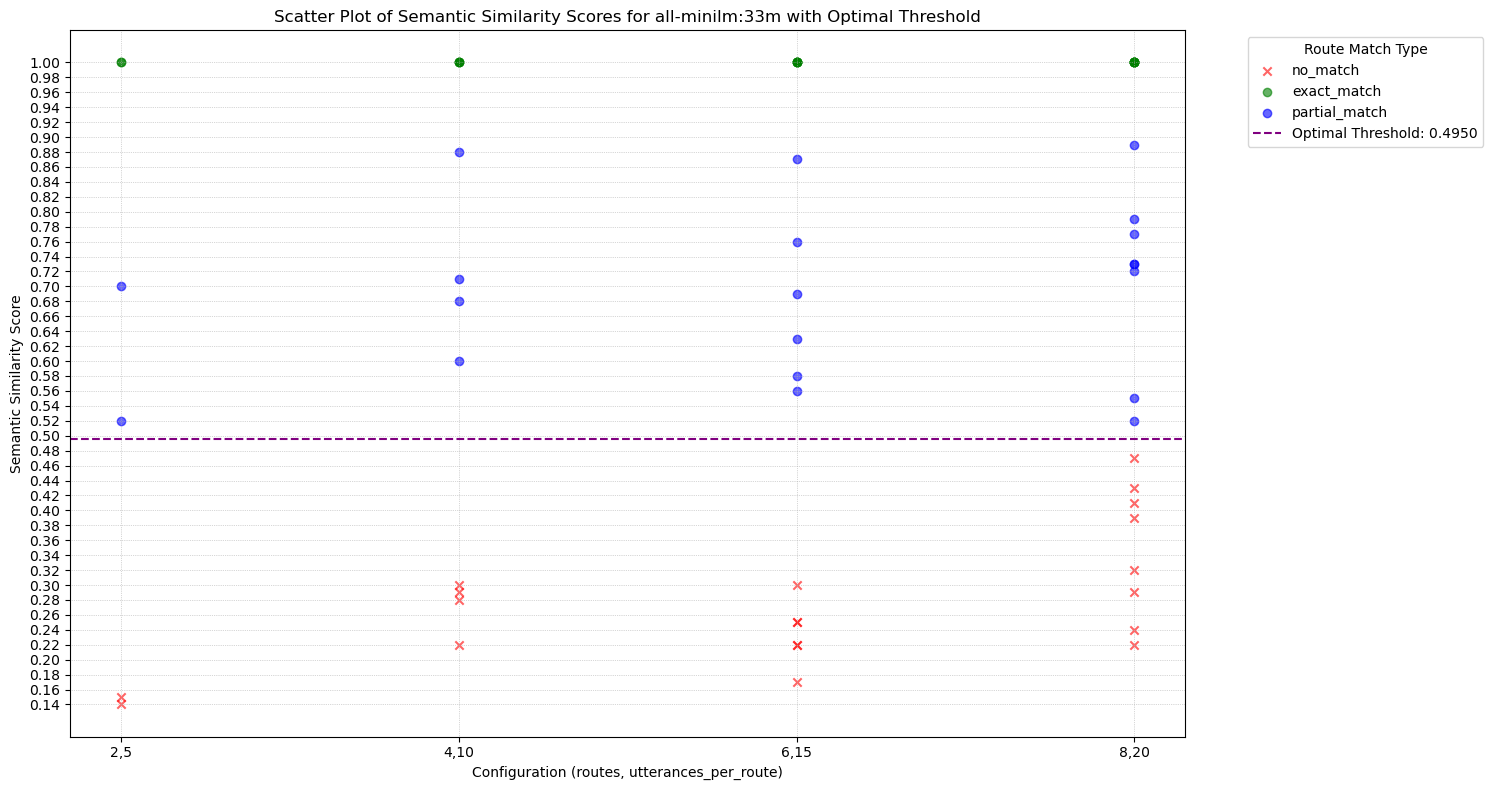

Max 'no_match' score: 0.4700
Min 'partial_match' score: 0.5200
Min 'exact_match' score: 1.0000
Optimal Threshold: 0.4950

Statistics for scores above the threshold:
count    40.000000
mean      0.847000
std       0.174579
min       0.520000
25%       0.707500
50%       0.945000
75%       1.000000
max       1.000000
Name: semantic_similarity_score, dtype: float64

Statistics for scores below the threshold:
count    20.000000
mean      0.278000
std       0.090763
min       0.140000
25%       0.220000
50%       0.265000
75%       0.305000
max       0.470000
Name: semantic_similarity_score, dtype: float64

Confusion Matrix:
True Positives: 40
True Negatives: 20
False Positives: 0
False Negatives: 0

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


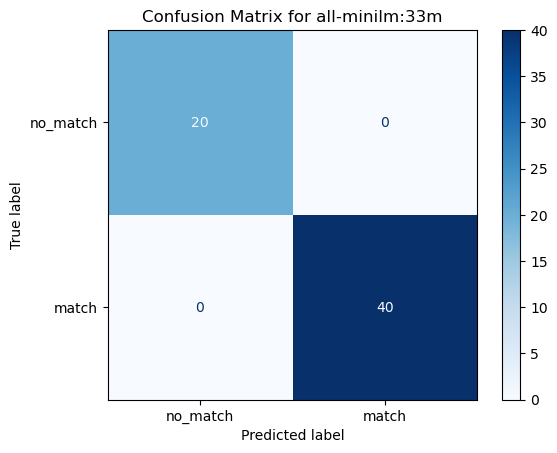

In [12]:

# Filter the data for the 'all-minilm:33m' embedding model
minilm_data = df[df['embed_model'] == 'all-minilm:33m']

# Calculate the max of 'no_match' and min of 'partial_match' and 'exact_match'
max_no_match = minilm_data[minilm_data['true_route_match_type'] == 'no_match']['semantic_similarity_score'].max()
min_partial_match = minilm_data[minilm_data['true_route_match_type'] == 'partial_match']['semantic_similarity_score'].min()
min_exact_match = minilm_data[minilm_data['true_route_match_type'] == 'exact_match']['semantic_similarity_score'].min()
min_match = min(min_partial_match, min_exact_match)

# Determine the threshold
# This code checks if the largest 'no_match' value is smaller than or equal to the smallest 'partial_match' or 'exact_match' value. 
# If so, it calculates the threshold as the midpoint. 
# If not, it still calculates a midpoint but labels it as a "Suggested" threshold due to overlap.
if max_no_match <= min_match:
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Optimal"
else:
    # Suggest a safe threshold
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Suggested (Overlap detected)"

# Create a scatter plot
plt.figure(figsize=(14, 8))  # Increased figure width to accommodate legend

# Create x-axis values
x_values = minilm_data['routes'].astype(str) + ',' + minilm_data['utterances_per_route'].astype(str)
x_numeric = pd.factorize(x_values)[0]

# Plot each match type separately
for match_type, color, marker in [('no_match', 'red', 'x'), 
                                  ('exact_match', 'green', 'o'), 
                                  ('partial_match', 'blue', 'o')]:
    data = minilm_data[minilm_data['true_route_match_type'] == match_type]
    x = pd.factorize(data['routes'].astype(str) + ',' + data['utterances_per_route'].astype(str))[0]
    plt.scatter(x, data['semantic_similarity_score'], 
                c=color, marker=marker, label=match_type, alpha=0.6)

# Add the threshold line
threshold_line = plt.axhline(y=threshold, color='purple', linestyle='--', 
                             label=f'{threshold_type} Threshold: {threshold:.4f}')

# Add plot labels and title
plt.xlabel('Configuration (routes, utterances_per_route)')
plt.ylabel('Semantic Similarity Score')
plt.title(f'Scatter Plot of Semantic Similarity Scores for all-minilm:33m with {threshold_type} Threshold')
plt.xticks(range(len(x_values.unique())), x_values.unique(), rotation=0)

# Set y-axis ticks with 0.02 intervals
y_min = minilm_data['semantic_similarity_score'].min()
y_max = minilm_data['semantic_similarity_score'].max()
y_ticks = np.arange(np.floor(y_min*50)/50, np.ceil(y_max*50)/50+0.02, 0.02)
plt.yticks(y_ticks)

# Add grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

# Adjust the plot layout to make room for the legend
plt.tight_layout()

# Move the legend outside the plot area to the top right
plt.legend(title='Route Match Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the subplot to make room for the legend
plt.subplots_adjust(right=0.85)

plt.show()

# Print threshold information
print(f"Max 'no_match' score: {max_no_match:.4f}")
print(f"Min 'partial_match' score: {min_partial_match:.4f}")
print(f"Min 'exact_match' score: {min_exact_match:.4f}")
print(f"{threshold_type} Threshold: {threshold:.4f}")

# Calculate and print statistics
print("\nStatistics for scores above the threshold:")
above_threshold = minilm_data[minilm_data['semantic_similarity_score'] >= threshold]['semantic_similarity_score']
print(above_threshold.describe())

print("\nStatistics for scores below the threshold:")
below_threshold = minilm_data[minilm_data['semantic_similarity_score'] < threshold]['semantic_similarity_score']
print(below_threshold.describe())

print("\nConfusion Matrix:")
true_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()
true_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()

print(f"True Positives: {true_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

accuracy = (true_positives + true_negatives) / len(minilm_data)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


# Define the true labels based on 'no_match' being 0 and the rest being 1
true_labels = np.where(minilm_data['true_route_match_type'] == 'no_match', 0, 1)

# Define the predicted labels based on the threshold
predicted_labels = np.where(minilm_data['semantic_similarity_score'] >= threshold, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no_match', 'match'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for all-minilm:33m')
plt.grid(False)
plt.show()

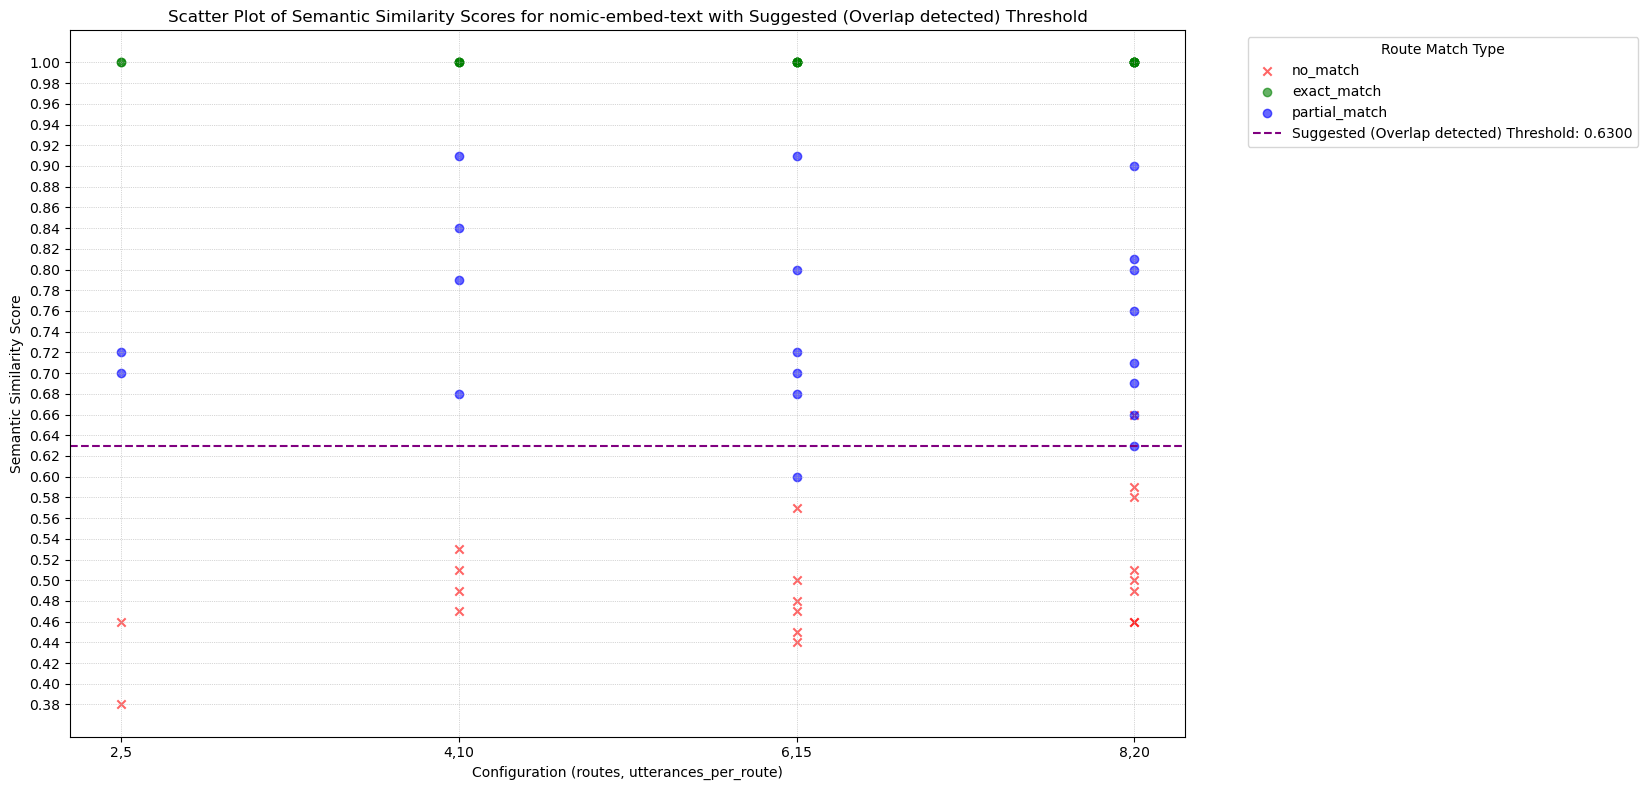

Max 'no_match' score: 0.6600
Min 'partial_match' score: 0.6000
Min 'exact_match' score: 1.0000
Suggested (Overlap detected) Threshold: 0.6300

Statistics for scores above the threshold:
count    40.000000
mean      0.876750
std       0.138849
min       0.630000
25%       0.720000
50%       0.955000
75%       1.000000
max       1.000000
Name: semantic_similarity_score, dtype: float64

Statistics for scores below the threshold:
count    20.00000
mean      0.49700
std       0.05526
min       0.38000
25%       0.46000
50%       0.49000
75%       0.51500
max       0.60000
Name: semantic_similarity_score, dtype: float64

Confusion Matrix:
True Positives: 39
True Negatives: 19
False Positives: 1
False Negatives: 1

Accuracy: 0.9667
Precision: 0.9750
Recall: 0.9750
F1 Score: 0.9750


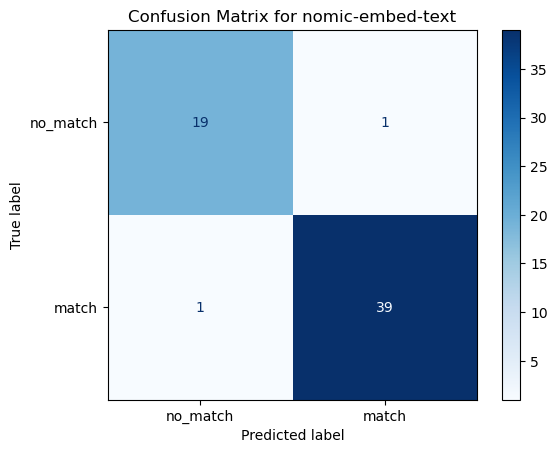

In [13]:

# Filter the data for the 'nomic-embed-text' embedding model
minilm_data = df[df['embed_model'] == 'nomic-embed-text']

# Calculate the max of 'no_match' and min of 'partial_match' and 'exact_match'
max_no_match = minilm_data[minilm_data['true_route_match_type'] == 'no_match']['semantic_similarity_score'].max()
min_partial_match = minilm_data[minilm_data['true_route_match_type'] == 'partial_match']['semantic_similarity_score'].min()
min_exact_match = minilm_data[minilm_data['true_route_match_type'] == 'exact_match']['semantic_similarity_score'].min()
min_match = min(min_partial_match, min_exact_match)

# Determine the threshold
# This code checks if the largest 'no_match' value is smaller than or equal to the smallest 'partial_match' or 'exact_match' value. 
# If so, it calculates the threshold as the midpoint. 
# If not, it still calculates a midpoint but labels it as a "Suggested" threshold due to overlap.
if max_no_match <= min_match:
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Optimal"
else:
    # Suggest a safe threshold
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Suggested (Overlap detected)"

# Create a scatter plot
plt.figure(figsize=(14, 8))  # Increased figure width to accommodate legend

# Create x-axis values
x_values = minilm_data['routes'].astype(str) + ',' + minilm_data['utterances_per_route'].astype(str)
x_numeric = pd.factorize(x_values)[0]

# Plot each match type separately
for match_type, color, marker in [('no_match', 'red', 'x'), 
                                  ('exact_match', 'green', 'o'), 
                                  ('partial_match', 'blue', 'o')]:
    data = minilm_data[minilm_data['true_route_match_type'] == match_type]
    x = pd.factorize(data['routes'].astype(str) + ',' + data['utterances_per_route'].astype(str))[0]
    plt.scatter(x, data['semantic_similarity_score'], 
                c=color, marker=marker, label=match_type, alpha=0.6)

# Add the threshold line
threshold_line = plt.axhline(y=threshold, color='purple', linestyle='--', 
                             label=f'{threshold_type} Threshold: {threshold:.4f}')

# Add plot labels and title
plt.xlabel('Configuration (routes, utterances_per_route)')
plt.ylabel('Semantic Similarity Score')
plt.title(f'Scatter Plot of Semantic Similarity Scores for nomic-embed-text with {threshold_type} Threshold')
plt.xticks(range(len(x_values.unique())), x_values.unique(), rotation=0)

# Set y-axis ticks with 0.02 intervals
y_min = minilm_data['semantic_similarity_score'].min()
y_max = minilm_data['semantic_similarity_score'].max()
y_ticks = np.arange(np.floor(y_min*50)/50, np.ceil(y_max*50)/50+0.02, 0.02)
plt.yticks(y_ticks)

# Add grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

# Adjust the plot layout to make room for the legend
plt.tight_layout()

# Move the legend outside the plot area to the top right
plt.legend(title='Route Match Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the subplot to make room for the legend
plt.subplots_adjust(right=0.85)

plt.show()

# Print threshold information
print(f"Max 'no_match' score: {max_no_match:.4f}")
print(f"Min 'partial_match' score: {min_partial_match:.4f}")
print(f"Min 'exact_match' score: {min_exact_match:.4f}")
print(f"{threshold_type} Threshold: {threshold:.4f}")

# Calculate and print statistics
print("\nStatistics for scores above the threshold:")
above_threshold = minilm_data[minilm_data['semantic_similarity_score'] >= threshold]['semantic_similarity_score']
print(above_threshold.describe())

print("\nStatistics for scores below the threshold:")
below_threshold = minilm_data[minilm_data['semantic_similarity_score'] < threshold]['semantic_similarity_score']
print(below_threshold.describe())

print("\nConfusion Matrix:")
true_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()
true_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()

print(f"True Positives: {true_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

accuracy = (true_positives + true_negatives) / len(minilm_data)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


# Define the true labels based on 'no_match' being 0 and the rest being 1
true_labels = np.where(minilm_data['true_route_match_type'] == 'no_match', 0, 1)

# Define the predicted labels based on the threshold
predicted_labels = np.where(minilm_data['semantic_similarity_score'] >= threshold, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no_match', 'match'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for nomic-embed-text')
plt.grid(False)
plt.show()

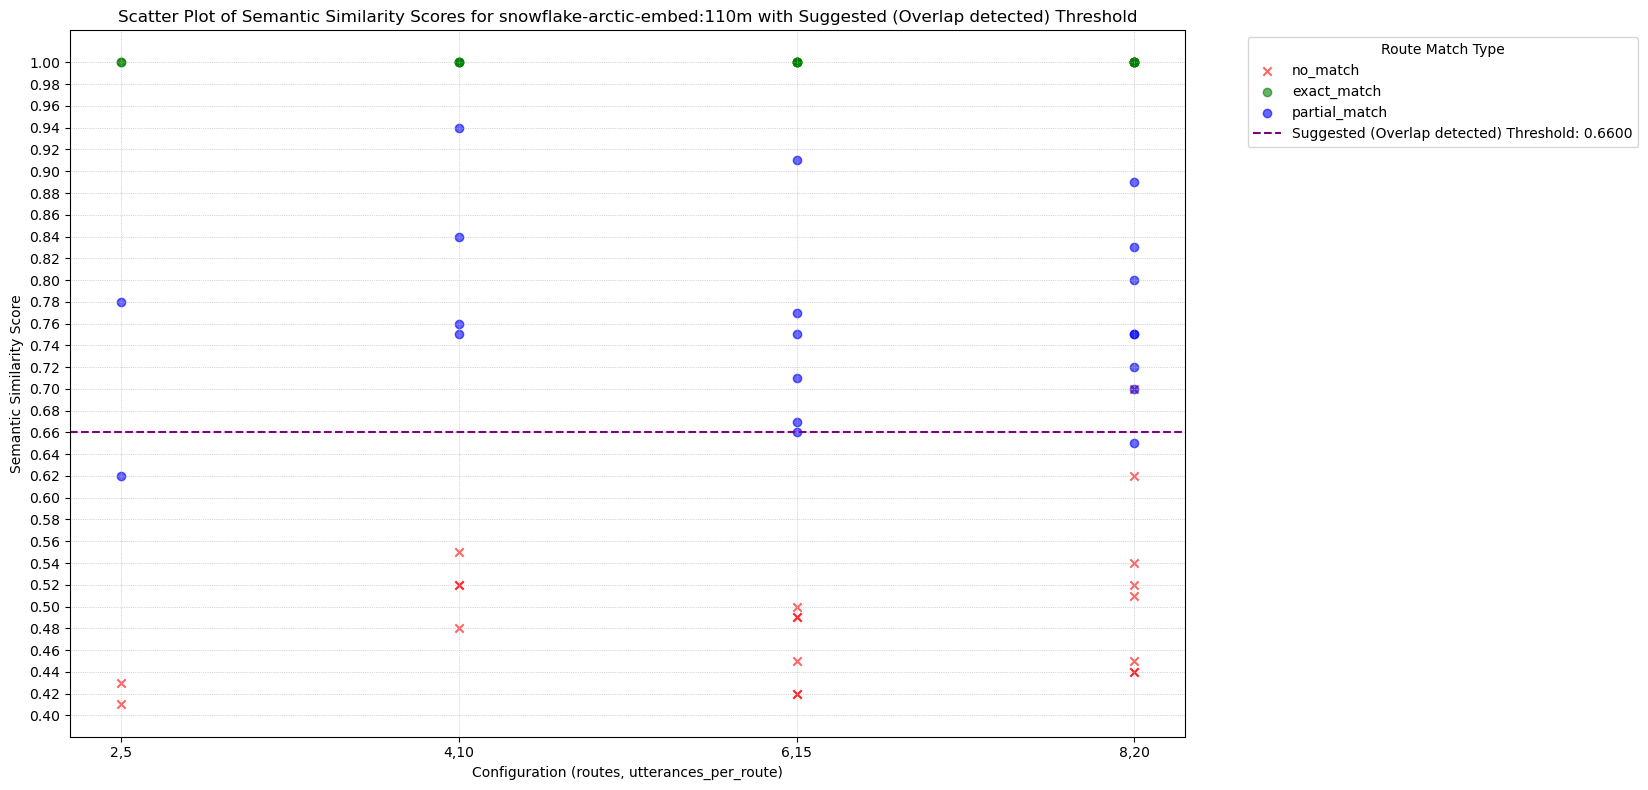

Max 'no_match' score: 0.7000
Min 'partial_match' score: 0.6200
Min 'exact_match' score: 1.0000
Suggested (Overlap detected) Threshold: 0.6600

Statistics for scores above the threshold:
count    39.000000
mean      0.889231
std       0.127287
min       0.660000
25%       0.755000
50%       1.000000
75%       1.000000
max       1.000000
Name: semantic_similarity_score, dtype: float64

Statistics for scores below the threshold:
count    21.000000
mean      0.498571
std       0.069013
min       0.410000
25%       0.440000
50%       0.490000
75%       0.520000
max       0.650000
Name: semantic_similarity_score, dtype: float64

Confusion Matrix:
True Positives: 38
True Negatives: 19
False Positives: 1
False Negatives: 2

Accuracy: 0.9500
Precision: 0.9744
Recall: 0.9500
F1 Score: 0.9620


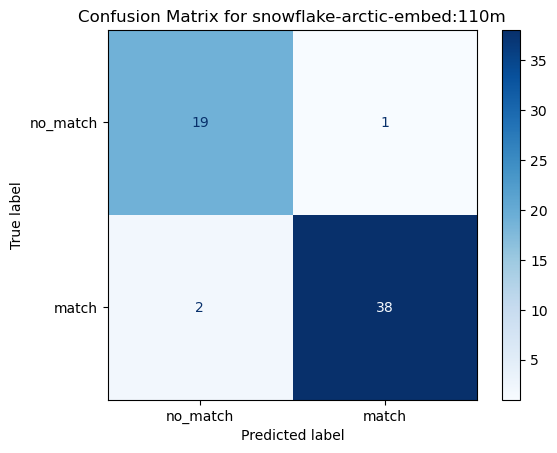

In [14]:

# Filter the data for the 'snowflake-arctic-embed:110m' embedding model
minilm_data = df[df['embed_model'] == 'snowflake-arctic-embed:110m']

# Calculate the max of 'no_match' and min of 'partial_match' and 'exact_match'
max_no_match = minilm_data[minilm_data['true_route_match_type'] == 'no_match']['semantic_similarity_score'].max()
min_partial_match = minilm_data[minilm_data['true_route_match_type'] == 'partial_match']['semantic_similarity_score'].min()
min_exact_match = minilm_data[minilm_data['true_route_match_type'] == 'exact_match']['semantic_similarity_score'].min()
min_match = min(min_partial_match, min_exact_match)

# Determine the threshold
# This code checks if the largest 'no_match' value is smaller than or equal to the smallest 'partial_match' or 'exact_match' value. 
# If so, it calculates the threshold as the midpoint. 
# If not, it still calculates a midpoint but labels it as a "Suggested" threshold due to overlap.
if max_no_match <= min_match:
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Optimal"
else:
    # Suggest a safe threshold
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Suggested (Overlap detected)"

# Create a scatter plot
plt.figure(figsize=(14, 8))  # Increased figure width to accommodate legend

# Create x-axis values
x_values = minilm_data['routes'].astype(str) + ',' + minilm_data['utterances_per_route'].astype(str)
x_numeric = pd.factorize(x_values)[0]

# Plot each match type separately
for match_type, color, marker in [('no_match', 'red', 'x'), 
                                  ('exact_match', 'green', 'o'), 
                                  ('partial_match', 'blue', 'o')]:
    data = minilm_data[minilm_data['true_route_match_type'] == match_type]
    x = pd.factorize(data['routes'].astype(str) + ',' + data['utterances_per_route'].astype(str))[0]
    plt.scatter(x, data['semantic_similarity_score'], 
                c=color, marker=marker, label=match_type, alpha=0.6)

# Add the threshold line
threshold_line = plt.axhline(y=threshold, color='purple', linestyle='--', 
                             label=f'{threshold_type} Threshold: {threshold:.4f}')

# Add plot labels and title
plt.xlabel('Configuration (routes, utterances_per_route)')
plt.ylabel('Semantic Similarity Score')
plt.title(f'Scatter Plot of Semantic Similarity Scores for snowflake-arctic-embed:110m with {threshold_type} Threshold')
plt.xticks(range(len(x_values.unique())), x_values.unique(), rotation=0)

# Set y-axis ticks with 0.02 intervals
y_min = minilm_data['semantic_similarity_score'].min()
y_max = minilm_data['semantic_similarity_score'].max()
y_ticks = np.arange(np.floor(y_min*50)/50, np.ceil(y_max*50)/50+0.02, 0.02)
plt.yticks(y_ticks)

# Add grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

# Adjust the plot layout to make room for the legend
plt.tight_layout()

# Move the legend outside the plot area to the top right
plt.legend(title='Route Match Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the subplot to make room for the legend
plt.subplots_adjust(right=0.85)

plt.show()

# Print threshold information
print(f"Max 'no_match' score: {max_no_match:.4f}")
print(f"Min 'partial_match' score: {min_partial_match:.4f}")
print(f"Min 'exact_match' score: {min_exact_match:.4f}")
print(f"{threshold_type} Threshold: {threshold:.4f}")

# Calculate and print statistics
print("\nStatistics for scores above the threshold:")
above_threshold = minilm_data[minilm_data['semantic_similarity_score'] >= threshold]['semantic_similarity_score']
print(above_threshold.describe())

print("\nStatistics for scores below the threshold:")
below_threshold = minilm_data[minilm_data['semantic_similarity_score'] < threshold]['semantic_similarity_score']
print(below_threshold.describe())

print("\nConfusion Matrix:")
true_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()
true_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()

print(f"True Positives: {true_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

accuracy = (true_positives + true_negatives) / len(minilm_data)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


# Define the true labels based on 'no_match' being 0 and the rest being 1
true_labels = np.where(minilm_data['true_route_match_type'] == 'no_match', 0, 1)

# Define the predicted labels based on the threshold
predicted_labels = np.where(minilm_data['semantic_similarity_score'] >= threshold, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no_match', 'match'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for snowflake-arctic-embed:110m')
plt.grid(False)
plt.show()

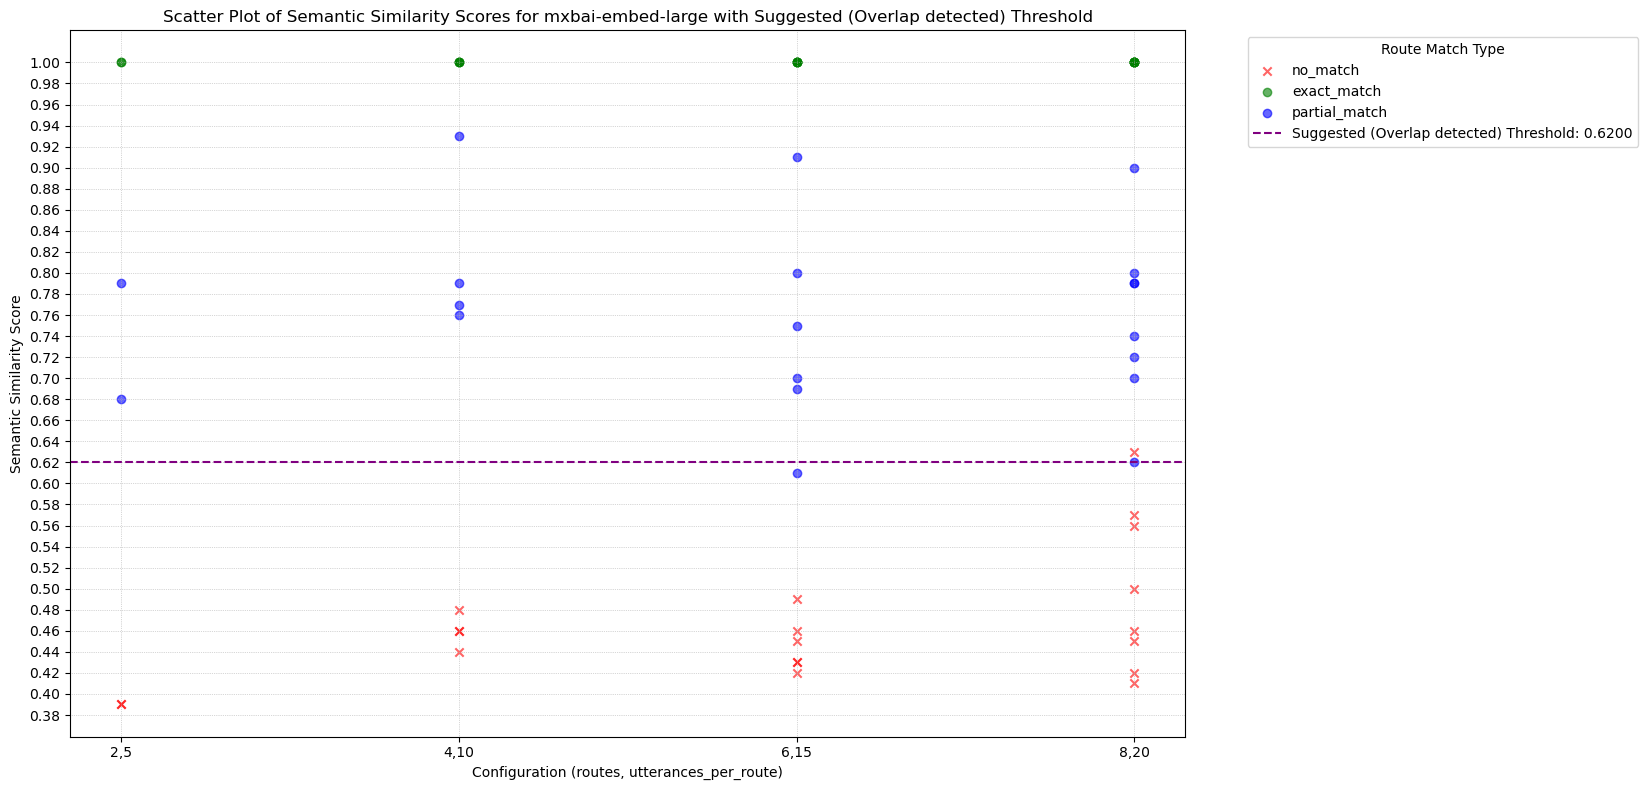

Max 'no_match' score: 0.6300
Min 'partial_match' score: 0.6100
Min 'exact_match' score: 1.0000
Suggested (Overlap detected) Threshold: 0.6200

Statistics for scores above the threshold:
count    40.000000
mean      0.881500
std       0.133638
min       0.620000
25%       0.767500
50%       0.965000
75%       1.000000
max       1.000000
Name: semantic_similarity_score, dtype: float64

Statistics for scores below the threshold:
count    20.000000
mean      0.464000
std       0.058526
min       0.390000
25%       0.427500
50%       0.455000
75%       0.482500
max       0.610000
Name: semantic_similarity_score, dtype: float64

Confusion Matrix:
True Positives: 39
True Negatives: 19
False Positives: 1
False Negatives: 1

Accuracy: 0.9667
Precision: 0.9750
Recall: 0.9750
F1 Score: 0.9750


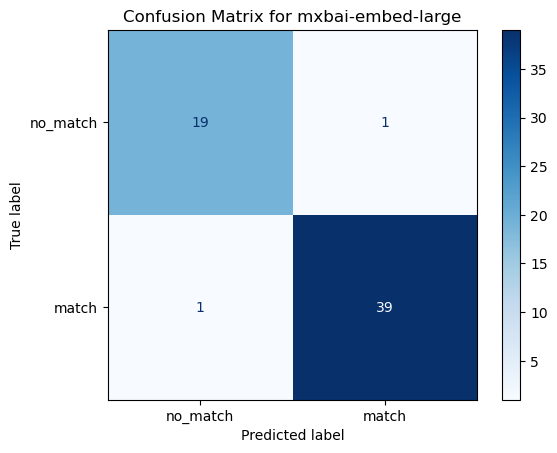

In [15]:

# Filter the data for the 'mxbai-embed-large' embedding model
minilm_data = df[df['embed_model'] == 'mxbai-embed-large']

# Calculate the max of 'no_match' and min of 'partial_match' and 'exact_match'
max_no_match = minilm_data[minilm_data['true_route_match_type'] == 'no_match']['semantic_similarity_score'].max()
min_partial_match = minilm_data[minilm_data['true_route_match_type'] == 'partial_match']['semantic_similarity_score'].min()
min_exact_match = minilm_data[minilm_data['true_route_match_type'] == 'exact_match']['semantic_similarity_score'].min()
min_match = min(min_partial_match, min_exact_match)

# Determine the threshold
# This code checks if the largest 'no_match' value is smaller than or equal to the smallest 'partial_match' or 'exact_match' value. 
# If so, it calculates the threshold as the midpoint. 
# If not, it still calculates a midpoint but labels it as a "Suggested" threshold due to overlap.
if max_no_match <= min_match:
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Optimal"
else:
    # Suggest a safe threshold
    threshold = (max_no_match + min_match) / 2
    threshold_type = "Suggested (Overlap detected)"

# Create a scatter plot
plt.figure(figsize=(14, 8))  # Increased figure width to accommodate legend

# Create x-axis values
x_values = minilm_data['routes'].astype(str) + ',' + minilm_data['utterances_per_route'].astype(str)
x_numeric = pd.factorize(x_values)[0]

# Plot each match type separately
for match_type, color, marker in [('no_match', 'red', 'x'), 
                                  ('exact_match', 'green', 'o'), 
                                  ('partial_match', 'blue', 'o')]:
    data = minilm_data[minilm_data['true_route_match_type'] == match_type]
    x = pd.factorize(data['routes'].astype(str) + ',' + data['utterances_per_route'].astype(str))[0]
    plt.scatter(x, data['semantic_similarity_score'], 
                c=color, marker=marker, label=match_type, alpha=0.6)

# Add the threshold line
threshold_line = plt.axhline(y=threshold, color='purple', linestyle='--', 
                             label=f'{threshold_type} Threshold: {threshold:.4f}')

# Add plot labels and title
plt.xlabel('Configuration (routes, utterances_per_route)')
plt.ylabel('Semantic Similarity Score')
plt.title(f'Scatter Plot of Semantic Similarity Scores for mxbai-embed-large with {threshold_type} Threshold')
plt.xticks(range(len(x_values.unique())), x_values.unique(), rotation=0)

# Set y-axis ticks with 0.02 intervals
y_min = minilm_data['semantic_similarity_score'].min()
y_max = minilm_data['semantic_similarity_score'].max()
y_ticks = np.arange(np.floor(y_min*50)/50, np.ceil(y_max*50)/50+0.02, 0.02)
plt.yticks(y_ticks)

# Add grid
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

# Adjust the plot layout to make room for the legend
plt.tight_layout()

# Move the legend outside the plot area to the top right
plt.legend(title='Route Match Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the subplot to make room for the legend
plt.subplots_adjust(right=0.85)

plt.show()

# Print threshold information
print(f"Max 'no_match' score: {max_no_match:.4f}")
print(f"Min 'partial_match' score: {min_partial_match:.4f}")
print(f"Min 'exact_match' score: {min_exact_match:.4f}")
print(f"{threshold_type} Threshold: {threshold:.4f}")

# Calculate and print statistics
print("\nStatistics for scores above the threshold:")
above_threshold = minilm_data[minilm_data['semantic_similarity_score'] >= threshold]['semantic_similarity_score']
print(above_threshold.describe())

print("\nStatistics for scores below the threshold:")
below_threshold = minilm_data[minilm_data['semantic_similarity_score'] < threshold]['semantic_similarity_score']
print(below_threshold.describe())

print("\nConfusion Matrix:")
true_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()
true_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_positives = ((minilm_data['semantic_similarity_score'] >= threshold) & (minilm_data['true_route_match_type'] == 'no_match')).sum()
false_negatives = ((minilm_data['semantic_similarity_score'] < threshold) & (minilm_data['true_route_match_type'] != 'no_match')).sum()

print(f"True Positives: {true_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

accuracy = (true_positives + true_negatives) / len(minilm_data)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Define the true labels based on 'no_match' being 0 and the rest being 1
true_labels = np.where(minilm_data['true_route_match_type'] == 'no_match', 0, 1)

# Define the predicted labels based on the threshold
predicted_labels = np.where(minilm_data['semantic_similarity_score'] >= threshold, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no_match', 'match'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for mxbai-embed-large')
plt.grid(False)
plt.show()

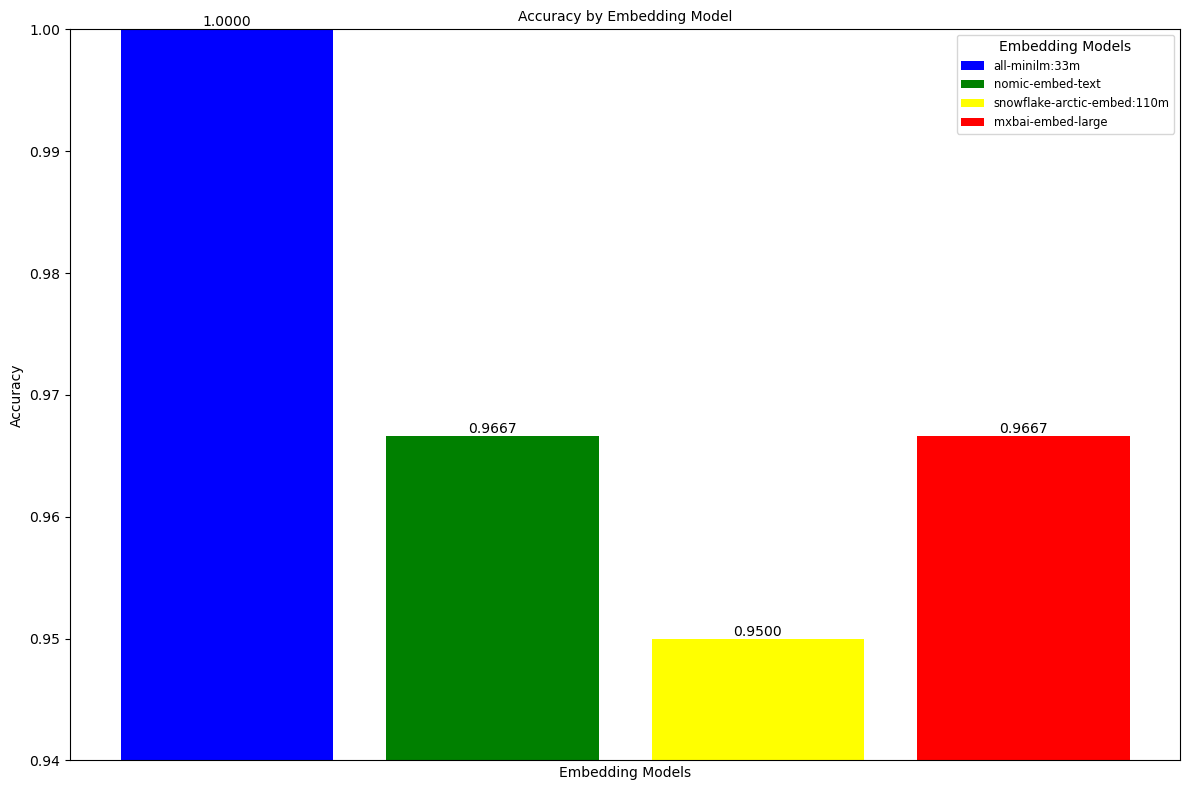

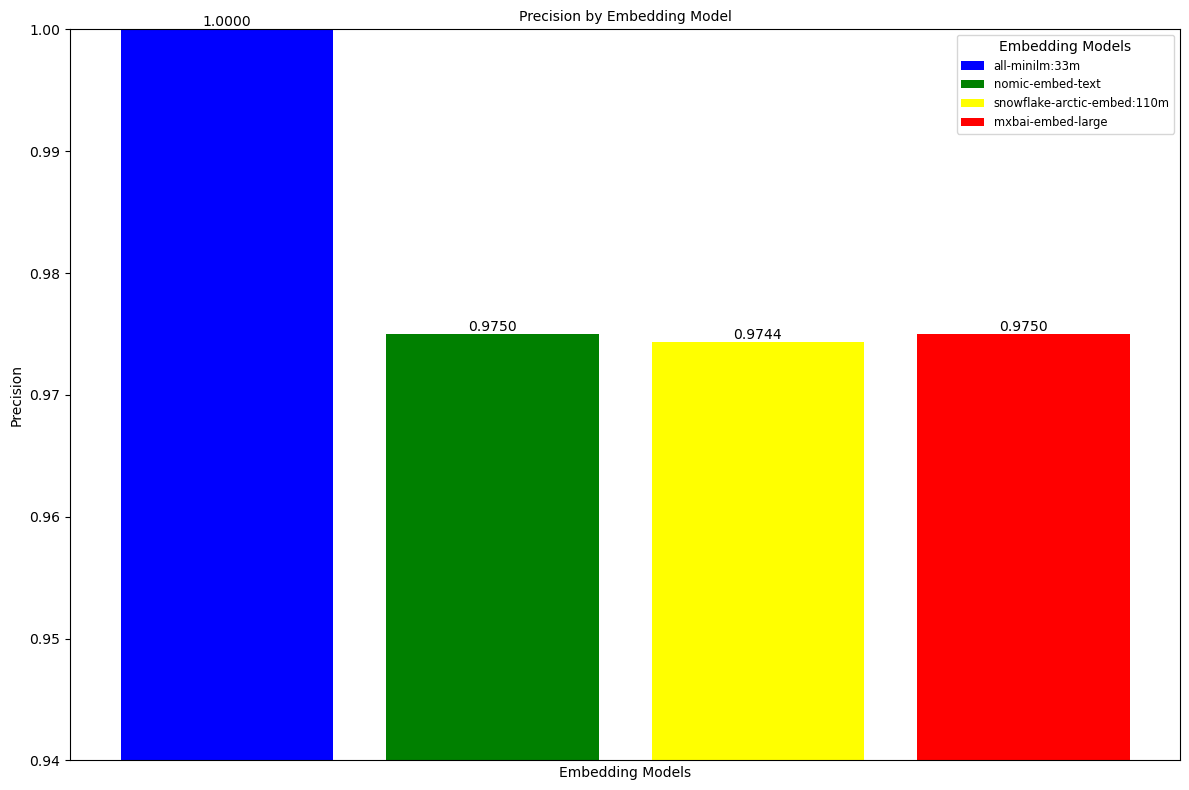

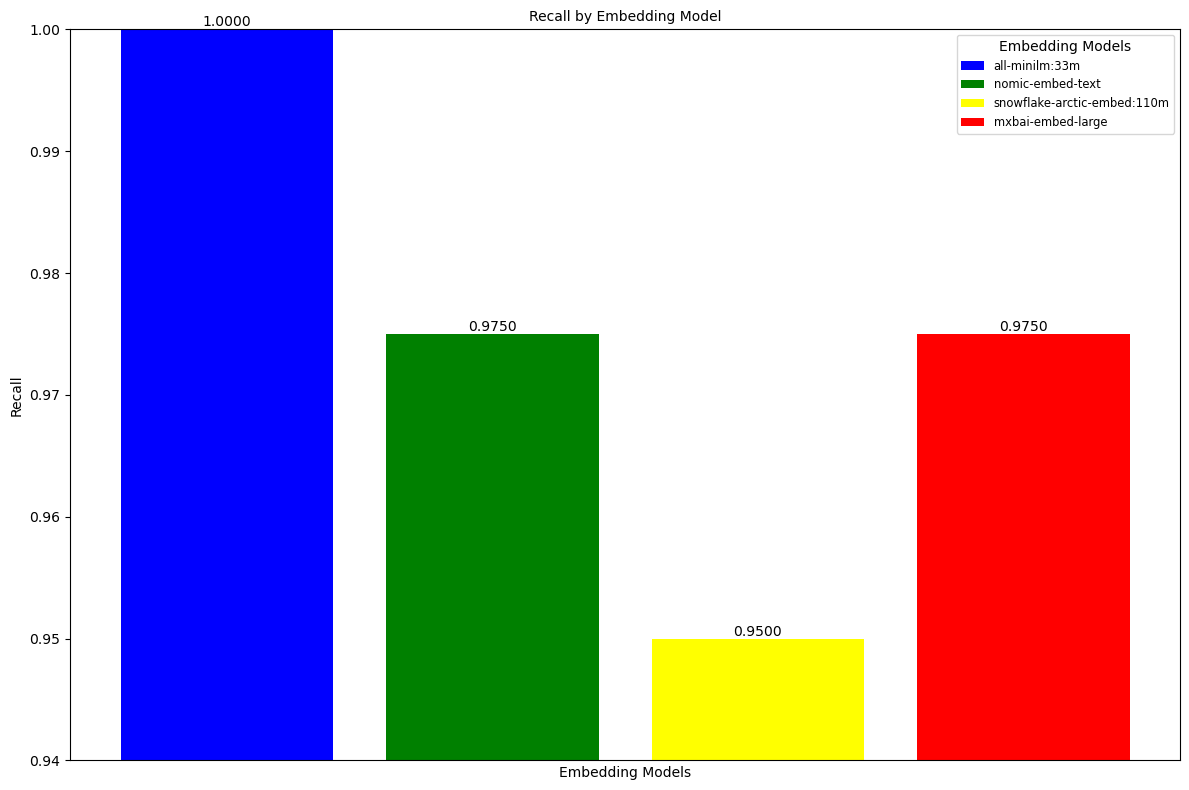

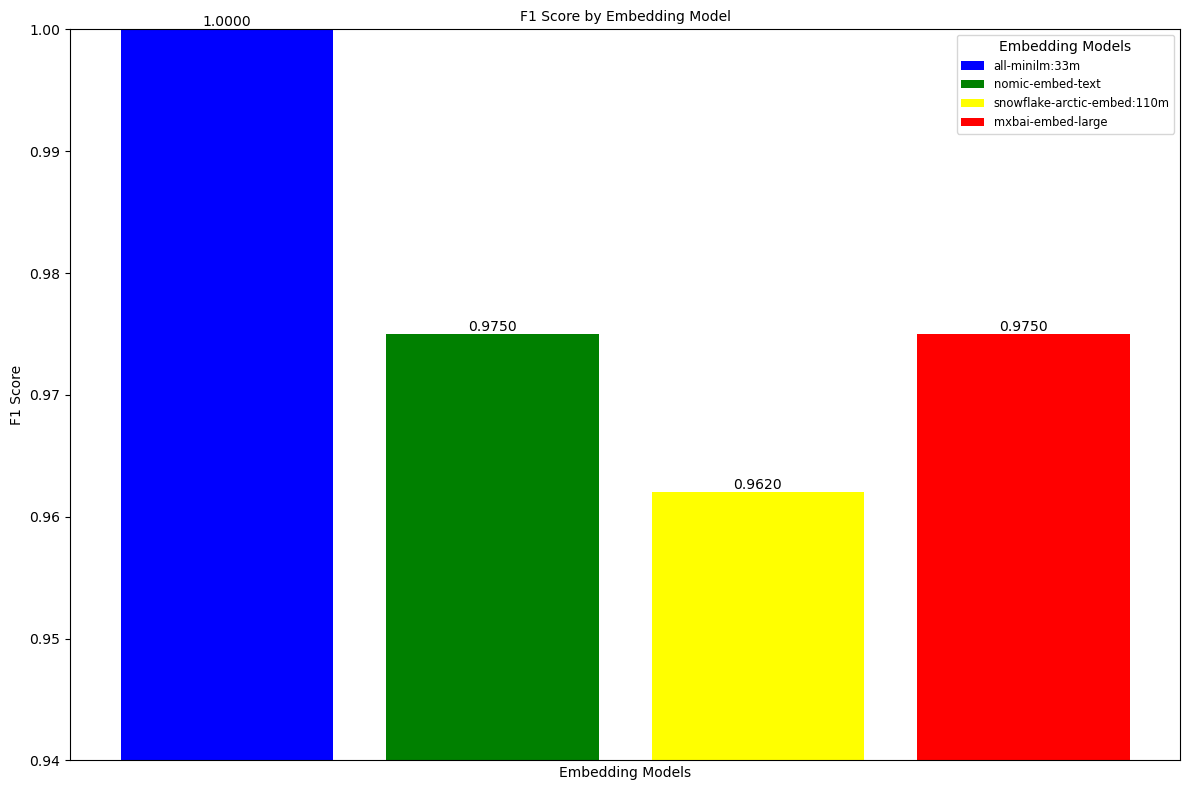

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score as sklearn_f1_score

# Initialize a dictionary to store metrics for each model
model_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

# Loop through unique embedding models in the dataset and compute metrics for each
for model_name in df['embed_model'].unique():
    model_data = df[df['embed_model'] == model_name]
    
    # Define the true labels based on 'no_match' being 0 and the rest being 1
    true_labels = np.where(model_data['true_route_match_type'] == 'no_match', 0, 1)
    
    # Determine a threshold based on the data
    max_no_match = model_data[model_data['true_route_match_type'] == 'no_match']['semantic_similarity_score'].max()
    min_partial_match = model_data[model_data['true_route_match_type'] == 'partial_match']['semantic_similarity_score'].min()
    min_exact_match = model_data[model_data['true_route_match_type'] == 'exact_match']['semantic_similarity_score'].min()
    min_match = min(min_partial_match, min_exact_match)
    
    threshold = (max_no_match + min_match) / 2
    
    # Define the predicted labels based on the threshold
    predicted_labels = np.where(model_data['semantic_similarity_score'] >= threshold, 1, 0)
    
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    true_positives = cm[1, 1]
    true_negatives = cm[0, 0]
    false_positives = cm[0, 1]
    false_negatives = cm[1, 0]
    
    # Calculate metrics
    accuracy = (true_positives + true_negatives) / len(model_data)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = sklearn_f1_score(true_labels, predicted_labels)
    
    # Store the metrics for this model
    model_metrics['model'].append(model_name)
    model_metrics['accuracy'].append(accuracy)
    model_metrics['precision'].append(precision)
    model_metrics['recall'].append(recall)
    model_metrics['f1_score'].append(f1)

# Create DataFrame from the metrics
metrics_df = pd.DataFrame(model_metrics)

# Function to create a single plot
def create_plot(metric, title):
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(metrics_df['model'])), metrics_df[metric], color=['blue', 'green', 'yellow', 'red'])
    plt.title(f'{title} by Embedding Model', fontsize=10)
    plt.ylabel(title, fontsize=10)
    plt.ylim(0.94, 1)
    plt.xticks([])  # Remove x-axis ticks
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}', ha='center', va='bottom')
    
    plt.legend(bars, metrics_df['model'], title="Embedding Models", loc='upper right', 
               bbox_to_anchor=(1, 1), ncol=1, fontsize='small')
    
    plt.xlabel('Embedding Models', fontsize=10)
    plt.tight_layout()
    plt.show()

# Create individual plots for each metric
create_plot('accuracy', 'Accuracy')
create_plot('precision', 'Precision')
create_plot('recall', 'Recall')
create_plot('f1_score', 'F1 Score')

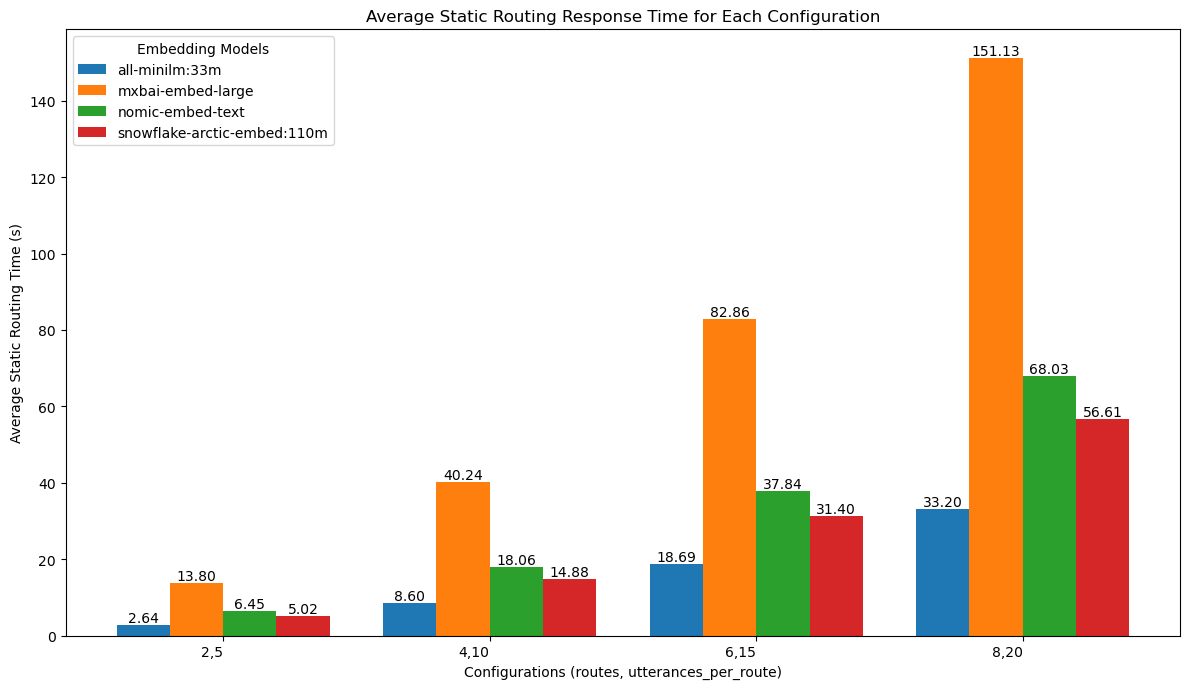

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Group data by configuration (routes, utterances_per_route, and embed_model) and calculate the mean routing time
avg_routing_times_config = df.groupby(['routes', 'utterances_per_route', 'embed_model'])['total_response_time'].mean().reset_index()

# Create a new column for configuration labels (routes, utterances_per_route)
avg_routing_times_config['config'] = avg_routing_times_config['routes'].astype(str) + ',' + avg_routing_times_config['utterances_per_route'].astype(str)

# Increase figure size to accommodate the plot
plt.figure(figsize=(12, 7))

# Get unique configurations and models
unique_configs = avg_routing_times_config['config'].unique()
unique_models = avg_routing_times_config['embed_model'].unique()

# Define bar width and position
bar_width = 0.2
bar_positions = np.arange(len(unique_configs))

# Iterate over each model and plot a bar for each configuration
for i, model in enumerate(unique_models):
    model_data = avg_routing_times_config[avg_routing_times_config['embed_model'] == model]
    bars = plt.bar(bar_positions + i * bar_width, model_data['total_response_time'], bar_width, label=model)

    # Add values on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Set plot titles and labels
plt.title('Average Static Routing Response Time for Each Configuration')
plt.xlabel('Configurations (routes, utterances_per_route)')
plt.ylabel('Average Static Routing Time (s)')

# Show all configurations on the x-axis
plt.xticks(bar_positions + (len(unique_models) - 1) * bar_width / 2, unique_configs, rotation=0, ha='right')

# Add legend to compare models
plt.legend(title="Embedding Models", loc='upper left')

# Adjust layout to prevent cutting off x-axis labels
plt.tight_layout()

# Show the plot
plt.show()
